# 이커머스 고객 행동 분석을 통한 이탈 요인 분석 및 예측

### 프로젝트 개요
- **분석 목표** : 이커머스 시장에서 고객들의 행동과 패턴을 분석하고 세분화하여 이탈 요인을 파악한 후 대응 전략과 그에 따른 이탈율 예측 모델 생성

  > 이탈 예방 포커스 - 어떠한 이유로 고객이 이탈하는지 파악  
  >이탈율과 관련이 있는 컬럼을 찾고 그것을 회귀 예측에 사용

## IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATALOAD

In [2]:
data=pd.read_csv("data/output.csv")

데이터 출처 : https://www.kaggle.com/datasets/ermismbatuhan/digital-marketing-ecommerce-customer-behavior/data

## DATA INFO

### 컬럼 정보  

AccountLength : 사용자 계정의 사용 기간 (개월 수)  
LocationCode : 사용자가 속한 지역 코드  
UserID : 사용자의 고유 식별자  
CreditCardInfoSave : 사용자가 신용카드 정보를 저장했는지 여부  
PushStatus : 푸시 알림 활성화 여부  
AddToWishlist : 관심 목록에 추가된 제품 수  
DesktopSessions : 데스크톱에서의 세션 수  
AppSessions : 앱에서의 세션 수  
DesktopTransactions : 데스크톱에서의 구매 건수  
TotalProductDetailViews : 총 제품 상세 조회 수  
SessionDuration : 각 세션의 평균 지속 시간  
PromotionClicks : 프로모션 클릭 수  
AvgOrderValue : 평균 주문 금액  
SaleProductViews : 세일 중인 제품 조회 수  
DiscountRatePerVisitedProducts : 방문한 제품 대비 평균 할인율  
ProductDetailViewPerAppSession : 앱 세션당 제품 상세 조회 수  
AppTransactions : 앱을 통한 구매 건수  
AddToCartPerSession : 세션당 장바구니에 추가된 횟수  
CustomerServiceCalls : 고객 서비스에 연락한 횟수  
Churn : 고객의 서비스 이탈 여부 (1: 이탈, 0: 유지)  


### 컬럼 보며 가설 수립
- 개인적인 이탈율 요인 top 3 예상
  > 관심 저하, 광고 부족 , 불만족

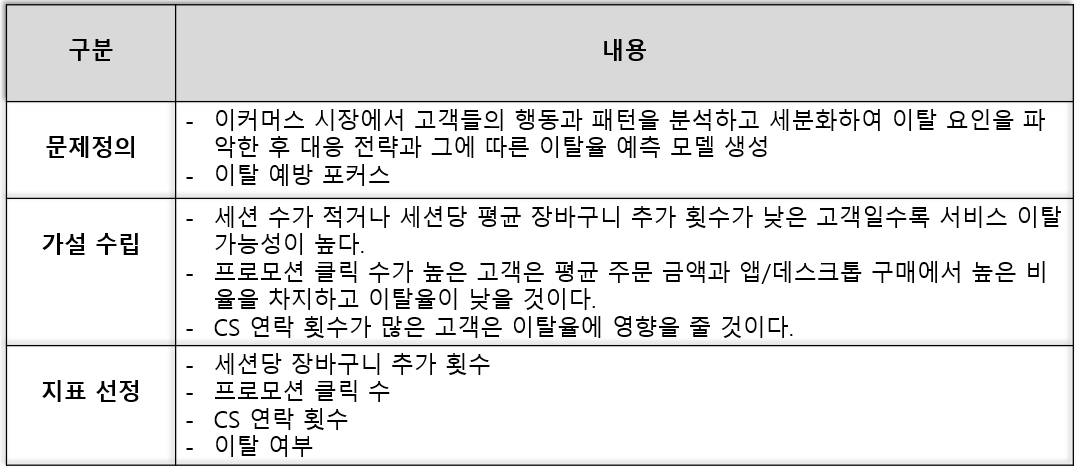

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,139.2,137,6.26,5.0,10,1.35,2,0


In [5]:
data.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

### - 중복 데이터 확인

In [7]:
data.duplicated().sum()

0

### - 결측치 확인

In [8]:
data.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

### - y값 분포 확인

In [9]:
data['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

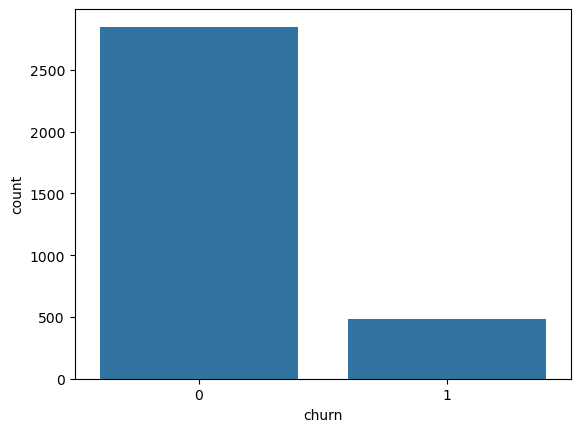

In [10]:
sns.countplot(x =data['churn'], data=data)

데이터 불균형 유의

***

## EDA

### 시각화 함수 정리

In [11]:
# 숫자형 변수 분석
def eda_int(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(data = data, x= var, hue = hue_var)
        plt.grid()
    
        plt.subplot(1,2,2)
        sns.kdeplot(data = data, x = var, hue = hue_var, multiple='fill')
        plt.axhline(data[hue_var].mean(), color='r')
        plt.show()


# 범주형 변수 분석
def eda_cat(data, var):
    # 데이터 개수와 비율 계산
    cnt = data[var].value_counts()
    prop = data[var].value_counts() / data.shape[0]
    result = pd.DataFrame({'Count': cnt, 'Proportion': prop})
    display(result)
    
    # 플롯 생성
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=var, data=data)
    plt.title(f'{var} Distribution', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 수치 표기
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')
    
    plt.show()


    
# 산점도 시각화
def eda_scat(data, target, var, hue='', churn_col='churn'):

    plt.figure(figsize = (8,8))
    
    # 이탈한 사람을 빨간색으로 표시
    if churn_col in data.columns:
        data['color'] = data[churn_col].apply(lambda x: 'red' if x == 1 else 'blue')  # 1이 이탈한 사람으로 가정

    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data, palette='coolwarm', hue = 'color')
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()


import pandas as pd
import statsmodels.api as sm

def log_reg_anal(data, independent_vars, dependent_var):
    X = data[independent_vars]
    y = data[dependent_var]

    X = sm.add_constant(X)
    
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    print(result.summary())
    const_pvalue = result.pvalues.iloc[0]  # iloc로 const의 p-value 접근
    print(f"const는 이탈율에 유의미한 영향을 미칩니다 (p-value: {const_pvalue:.4f})" if const_pvalue < 0.05 else f"const는 이탈율에 유의미한 영향을 미치지 않습니다 (p-value: {const_pvalue:.4f})")
    
    for var, p_val in zip(independent_vars, result.pvalues.iloc[1:]):  # 첫 번째 값은 const라서 1부터 시작
        if p_val < 0.05:
            print(f"{var}는 이탈율에 유의미한 영향을 미칩니다 (p-value: {p_val:.4f})")
        else:
            print(f"{var}는 이탈율에 유의미한 영향을 미치지 않습니다 (p-value: {p_val:.4f})")


### - 단변량 분석

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0


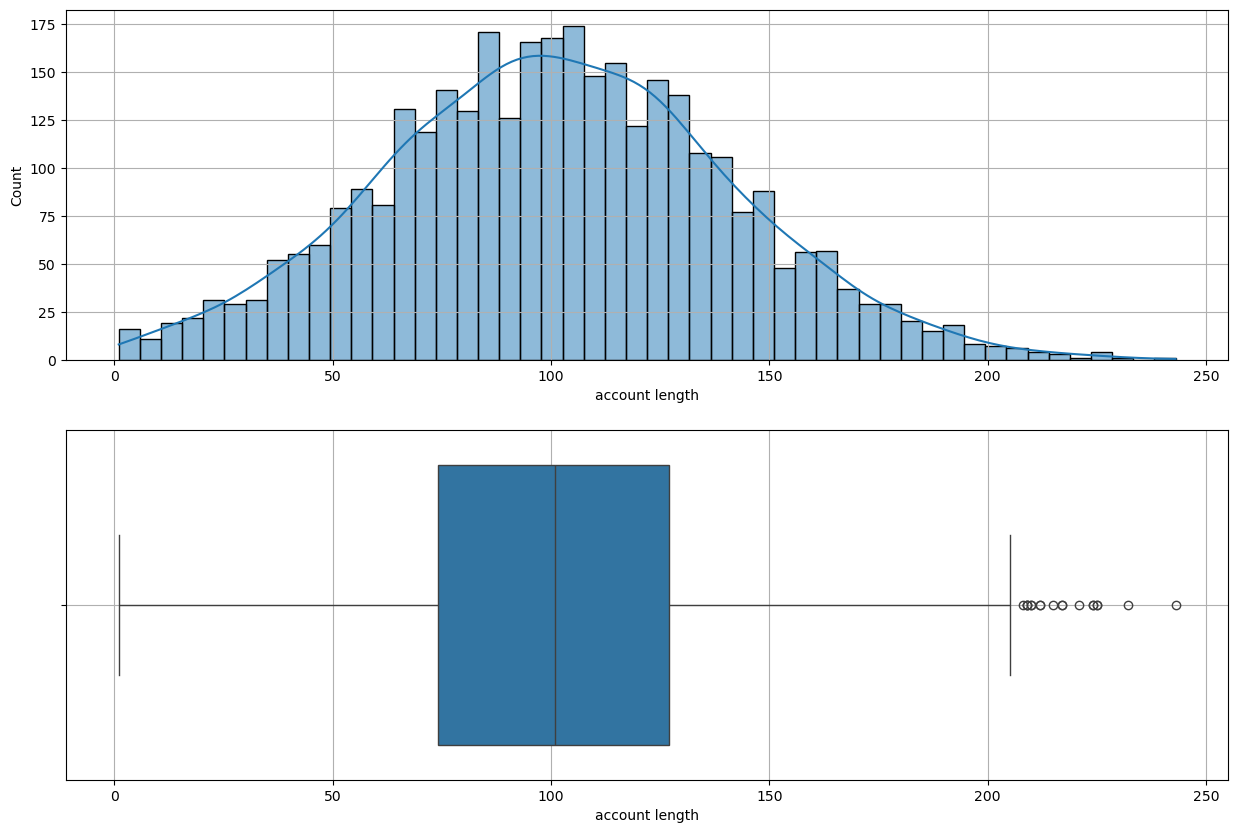

,count,mean,std,min,25%,50%,75%,max
desktop transactions,3333.0,17.087609,4.323795,0.0,14.0,17.0,20.0,31.0


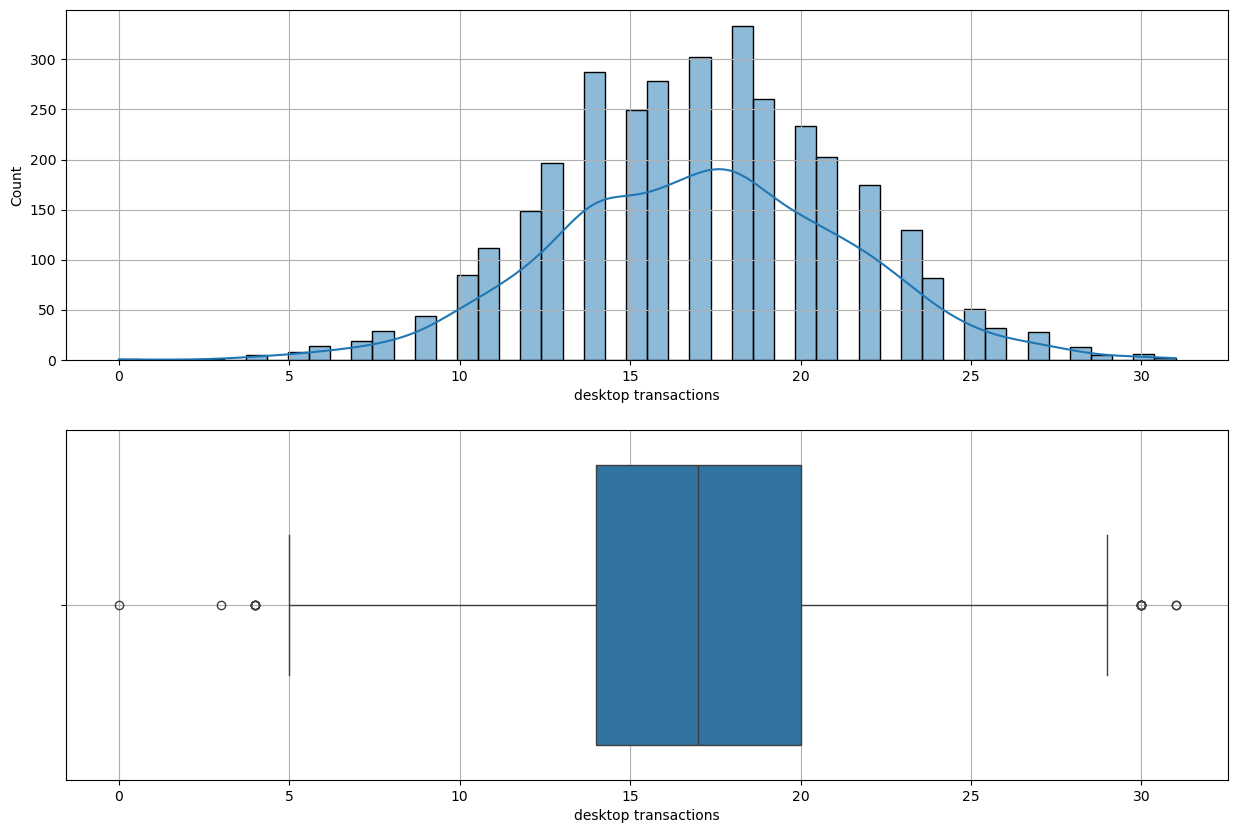

,count,mean,std,min,25%,50%,75%,max
app transactions,3333.0,4.479448,2.461214,0.0,3.0,4.0,6.0,20.0


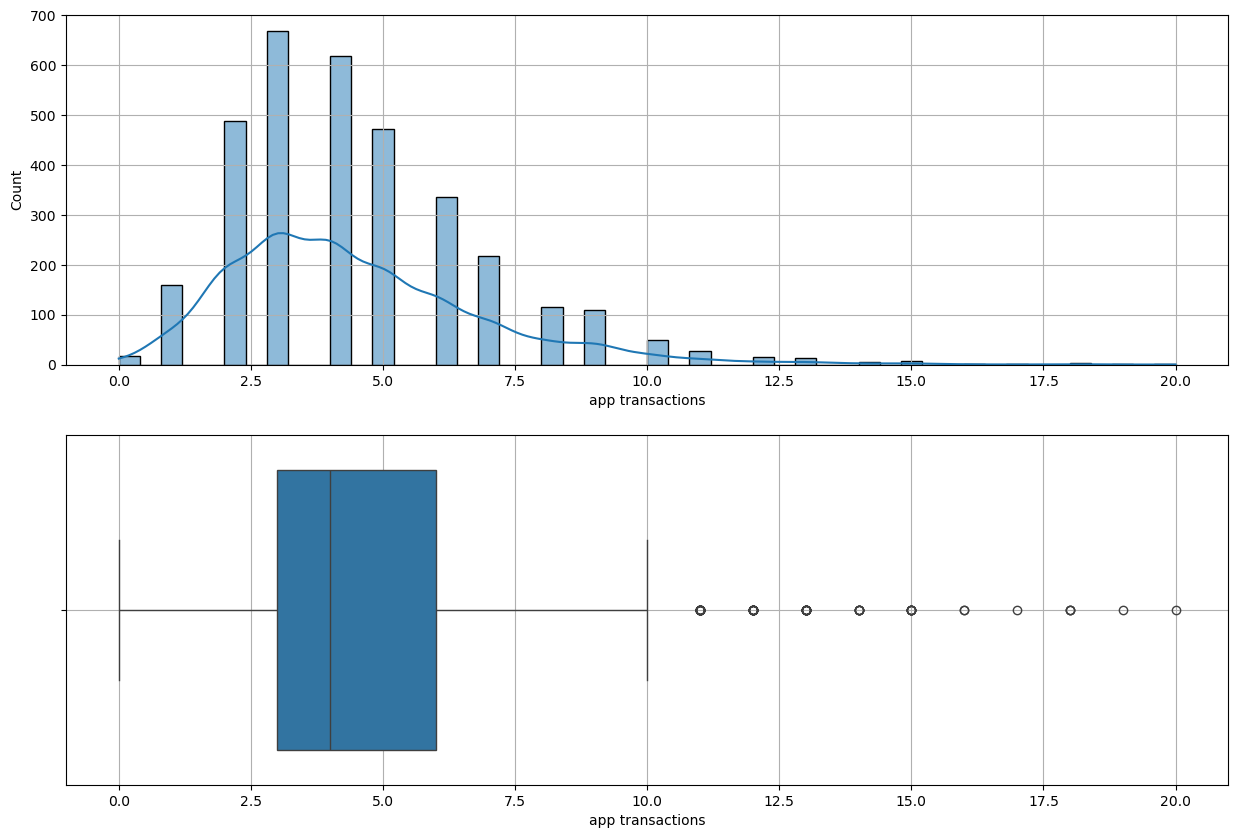

,count,mean,std,min,25%,50%,75%,max
session duration,3333.0,201.039604,50.714359,0.0,167.0,201.0,235.0,364.0


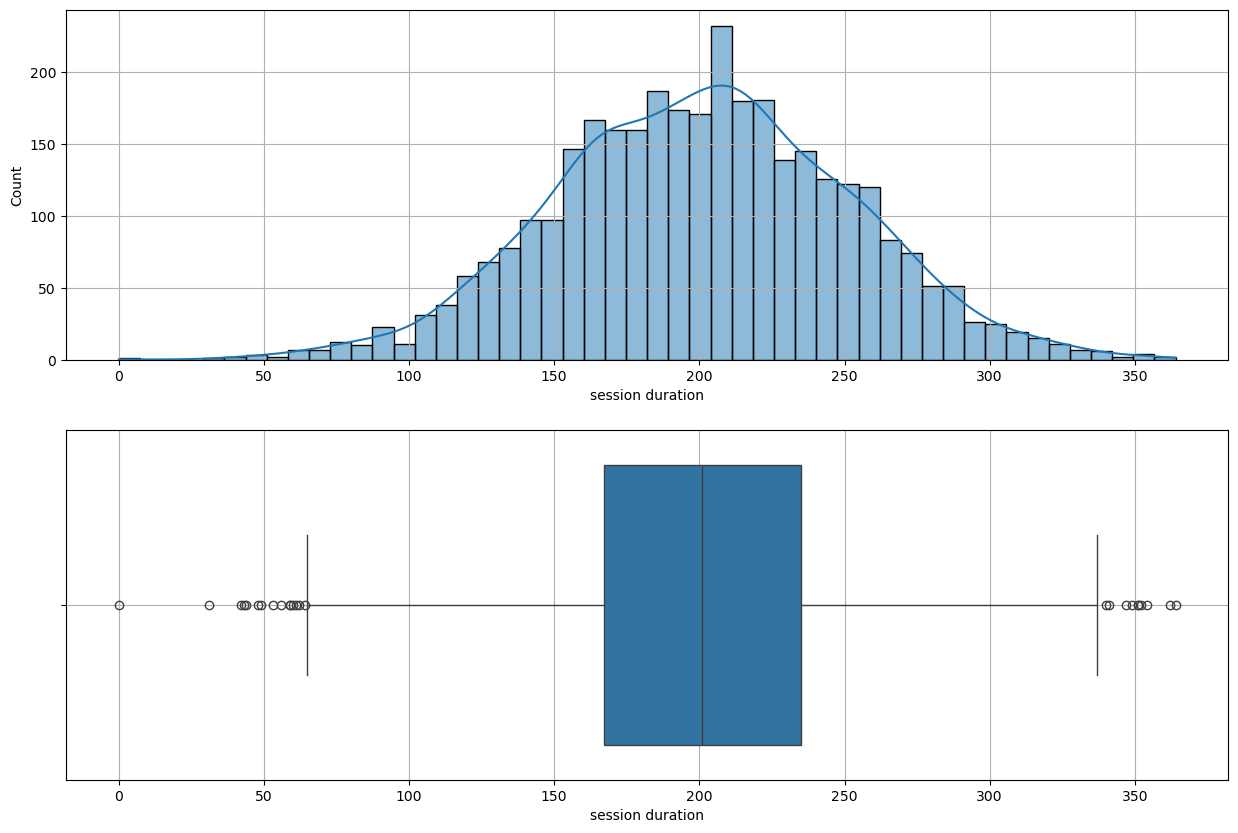

,count,mean,std,min,25%,50%,75%,max
promotion clicks,3333.0,100.110711,19.923911,0.0,87.0,100.0,114.0,170.0


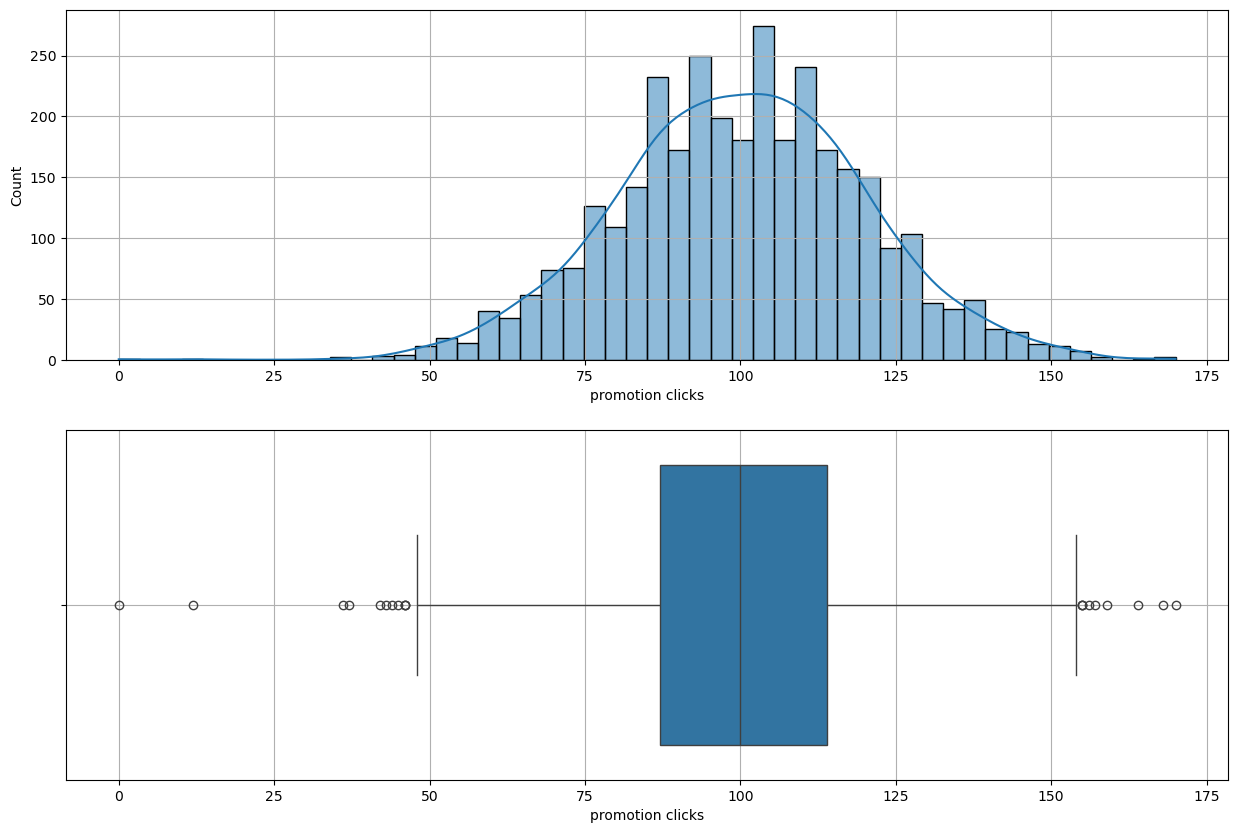

,count,mean,std,min,25%,50%,75%,max
add to cart per session,3333.0,2.764581,0.753773,0.0,2.3,2.78,3.27,5.4


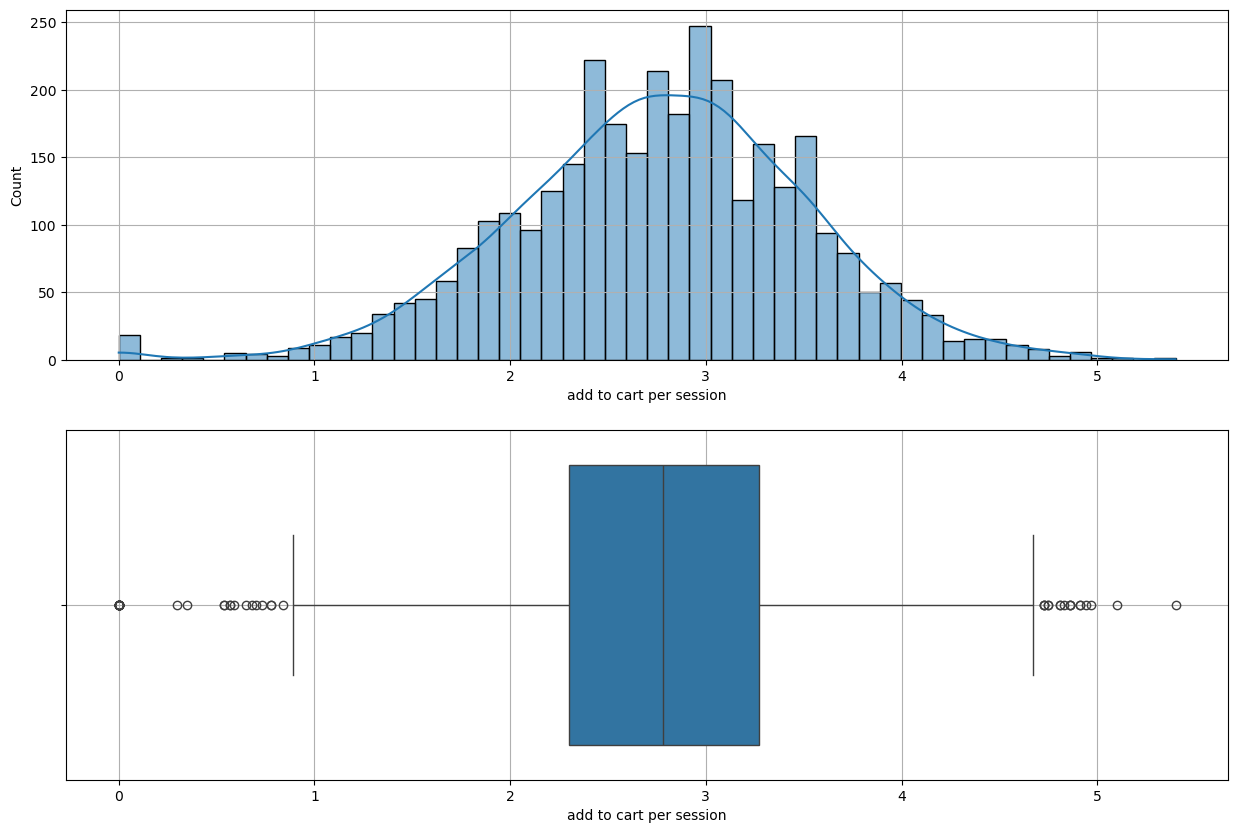

,count,mean,std,min,25%,50%,75%,max
customer service calls,3333.0,1.562856,1.315491,0.0,1.0,1.0,2.0,9.0


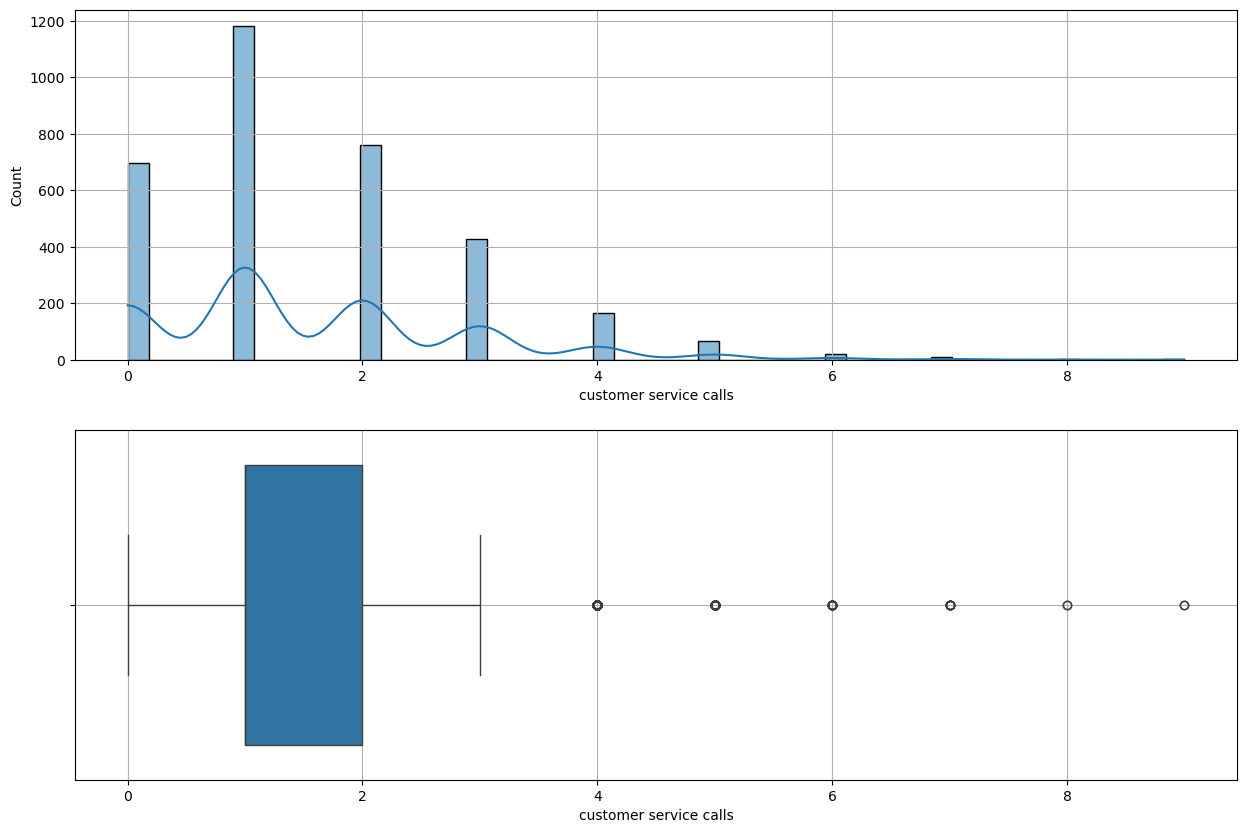

In [12]:
# 수치형 단변량 분석
eda_int(data, 'account length')
eda_int(data, 'desktop transactions')
eda_int(data, 'app transactions')
eda_int(data, 'session duration')
eda_int(data, 'promotion clicks')
eda_int(data, 'add to cart per session')
eda_int(data, 'customer service calls')

- 대부분 정규 분포를 따름
- 구매 건수는 앱보다 데스크 탑이 더 높다
- 고객 서비스에 연락한 비율은 대략 80%이다.

,Count,Proportion
credit card info save,,
no,3010,0.90309
yes,323,0.09691


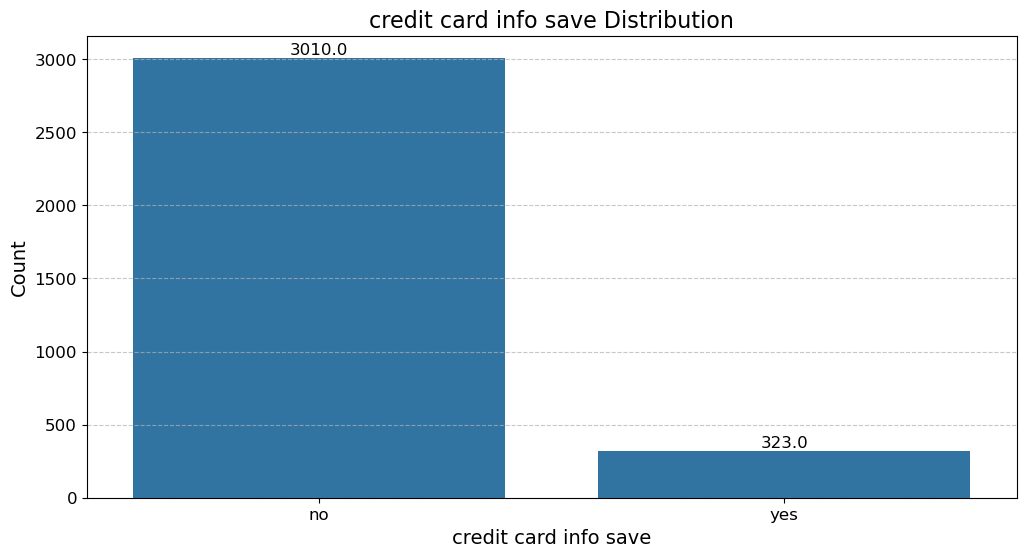

,Count,Proportion
push status,,
no,2411,0.723372
yes,922,0.276628


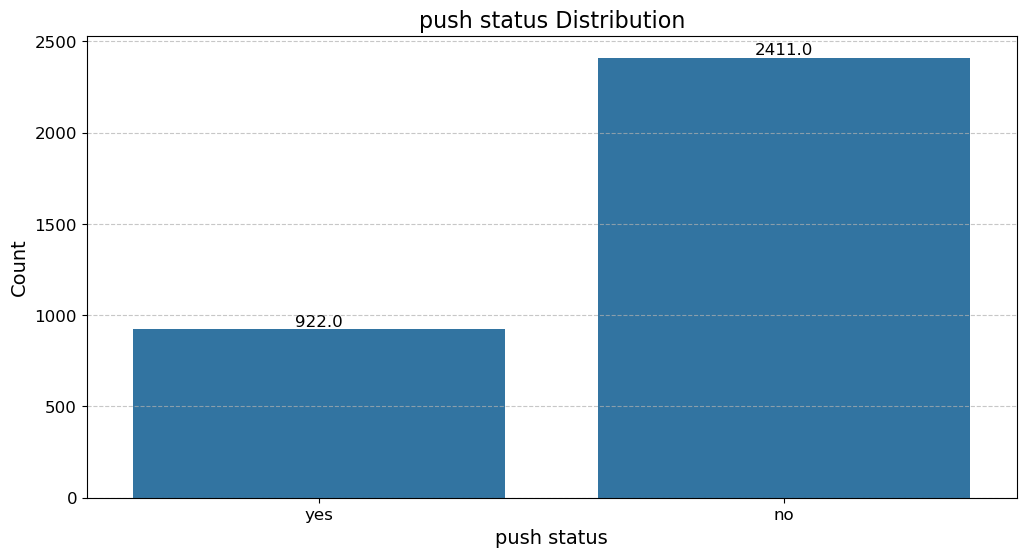

In [13]:
# 범주형 단변량 분석
eda_cat(data, 'credit card info save')
eda_cat(data, 'push status')

- 신용카드 저장 여부와 푸시 알림 활성화 여부와 연관된 컬럼을 엮어 이탈율을 확인할 만 하다

### - 이변량 분석

### 수치형
> 시각화 - kdeplot  
> 수치화 - 로지스틱 회귀

<Axes: >

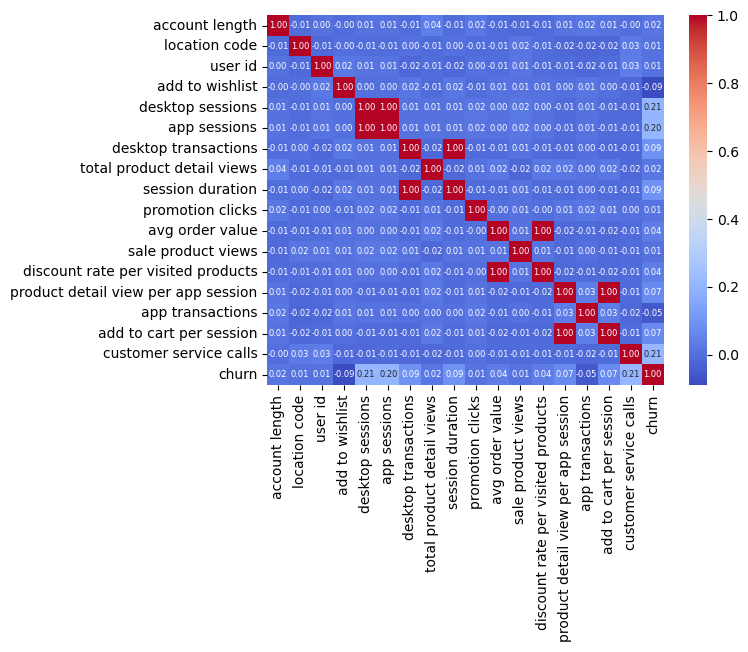

In [14]:
# 이탈율을 0,1 로 보고 선형성 파악을 위한 참고용 전체 상관 계수 확인 
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            annot_kws={"size": 6},
            )

- 이탈율과의 상관계수가 크진 않지만 top3 는  
  - 앱 세션  
  - 데스크 탑 세션  
  - cs연락 횟수

- 다중 공선성을 위배하는 독립 변수가 있다.  
  app session <-> desktop session  
  session duration <-> desktop transactions  
  discount rate per visited products <-> avg order value  
  add to cart per session <-> product detail view per app session  

  확인 요망

***

**가설 1. 세션 수가 적거나 세션당 평균 장바구니 추가 횟수가 낮은 고객일수록 서비스 이탈가능성이 높다.**


,count,mean,std,min,25%,50%,75%,max
add to cart per session,3333.0,2.764581,0.753773,0.0,2.3,2.78,3.27,5.4


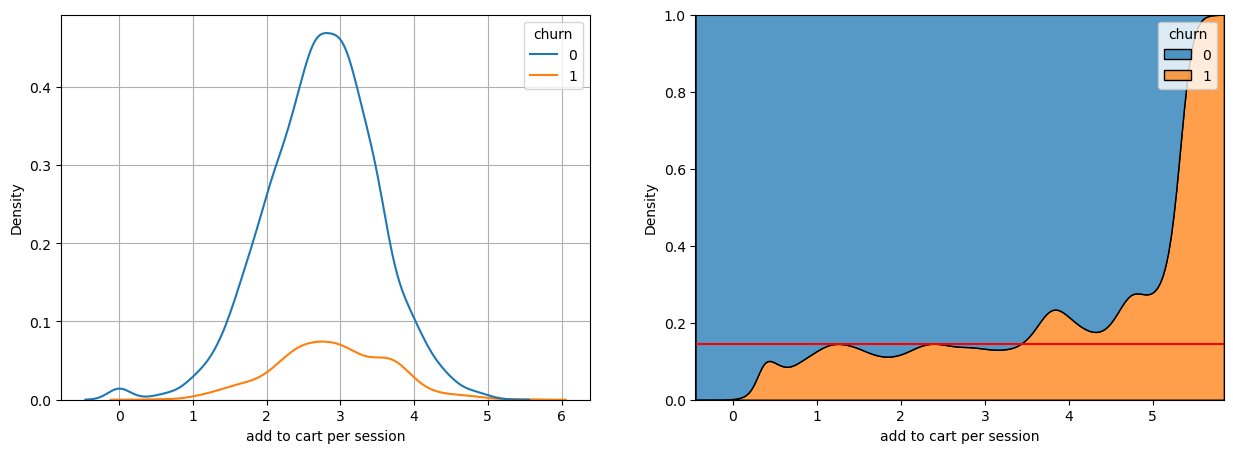

,count,mean,std,min,25%,50%,75%,max
desktop sessions,3333.0,179.811881,54.457135,0.0,144.0,179.0,216.0,351.0


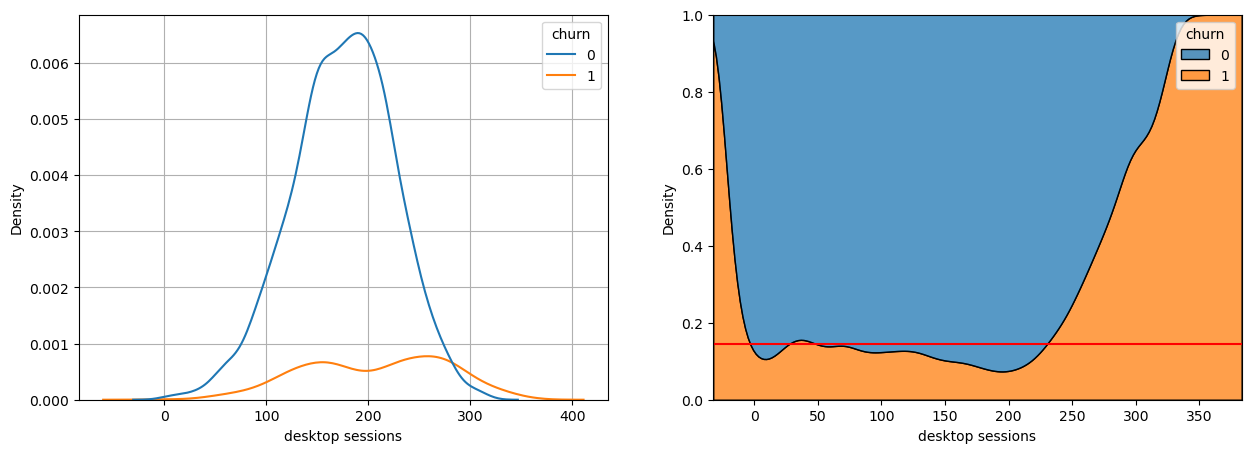

,count,mean,std,min,25%,50%,75%,max
app sessions,3333.0,30.567957,9.269376,0.0,24.0,31.0,37.0,60.0


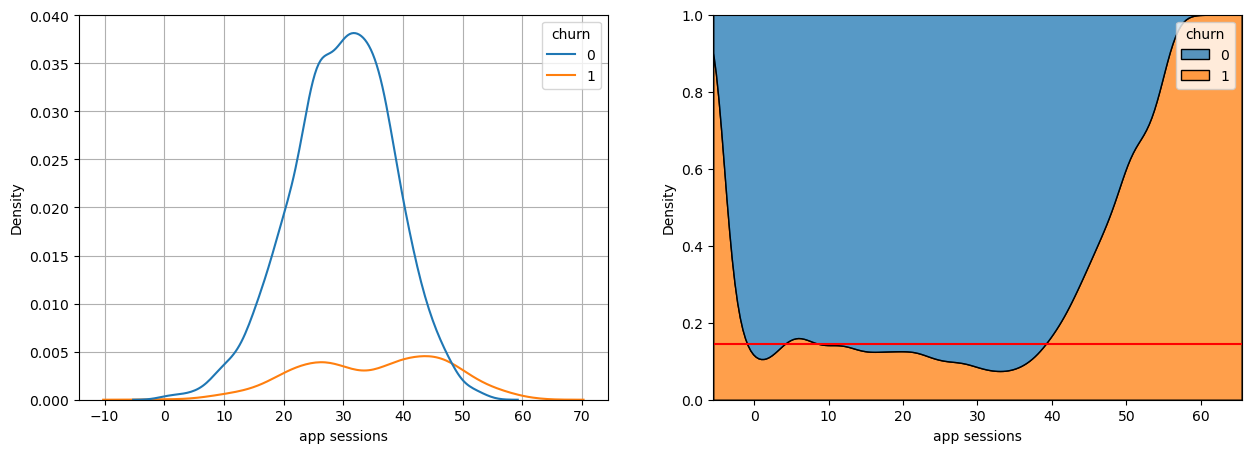

In [15]:
# kdeplot 그래프 분석
eda_int(data ,'add to cart per session','churn')
eda_int(data ,'desktop sessions','churn')
eda_int(data ,'app sessions','churn')

In [16]:
log_reg_anal(data,["add to cart per session",
                    "app sessions",
                    "desktop sessions"], "churn")

Optimization terminated successfully.
         Current function value: 0.389499
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                 0.05869
Time:                        17:55:02   Log-Likelihood:                -1298.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 7.157e-35
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.7510      0.288    -16.473      0.000      -5.316   

***

* 세션당 장바구니에 추가한 횟수는 이탈율과 관련이 있다

* 앱 세션과 데스크탑 세션은 이탈율과 관련이 적다
  > 앱/데스크탑 세션은 일정 수준을 넘어가면 이탈율이 급증한다  
  > 수치만 다를뿐 그래프는 거의 동일하다. 다중공선성 문제

H0 : 세션 수나 세션당 평균 장바구니 추가 횟수가 이탈율과 관련이 없다.  
H1 : 세션 수가 적거나 세션당 평균 장바구니 추가 횟수가 낮은 고객일수록 서비스 이탈 가능성이 높다.  


→ add to cart per session은 유의미하게 이탈율에 영향을 미친다고 나왔지만, 세션 수는 그렇지 않으므로 <span style="color:red">**가설 1 기각**</span>

***

**가설 2. 프로모션 클릭 수가 높은 고객은 평균 주문 금액과 앱/데스크톱 구매에서 높은 비율을 차지하고 이탈율이 낮을 것이다.**

프로모션 클릭 수와 평균 주문 금액, 앱/데스크토 구매와의 관계는 위 상관 계수 그래프에서
관련(선형성)이 적은걸로 판명 -> 산점도로 확인 해보기

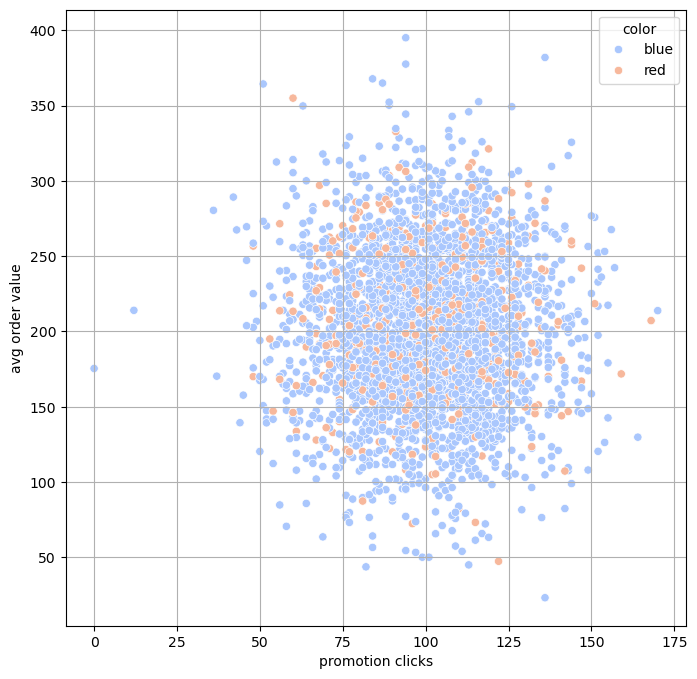

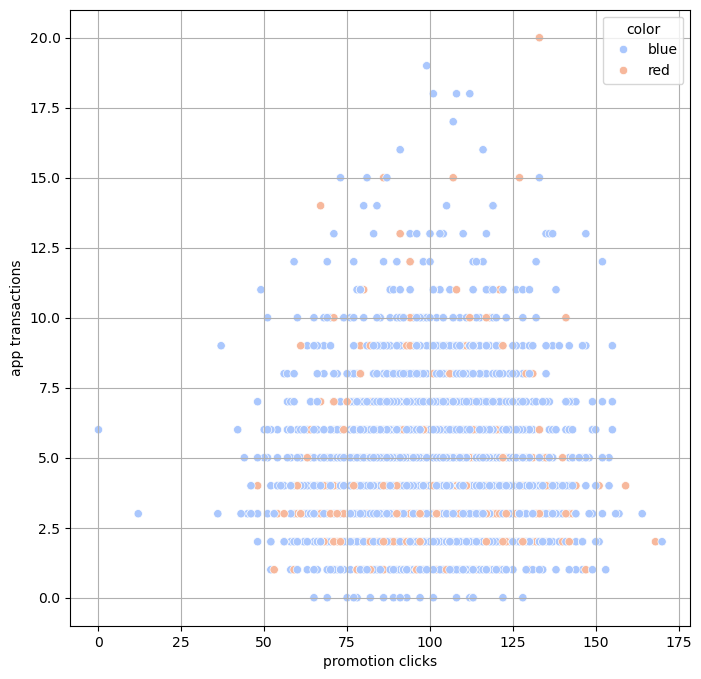

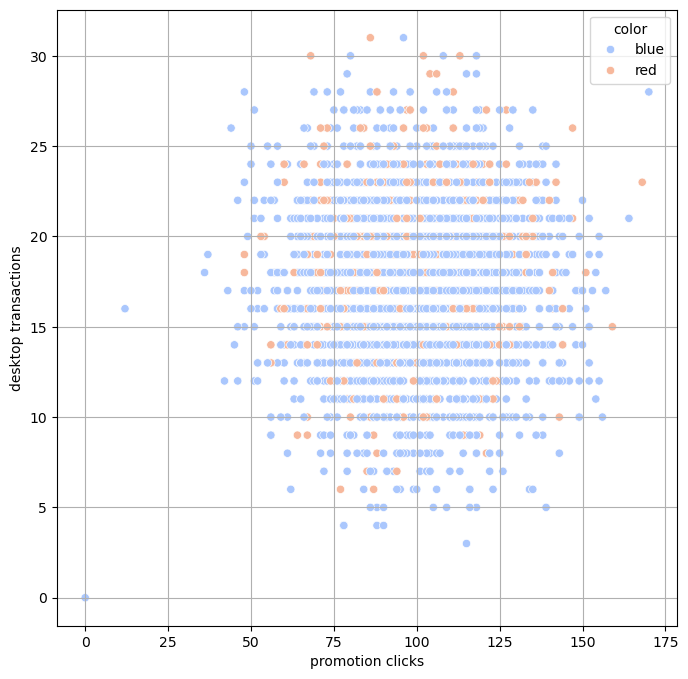

In [17]:
# 빨간 점은 이탈자
eda_scat(data ,'avg order value','promotion clicks')
eda_scat(data ,'app transactions','promotion clicks')
eda_scat(data ,'desktop transactions','promotion clicks')

H0: 프로모션 클릭수가 높은 고객은 평균 주문 금액과 앱/데스크톱 구매에서 높은 비율을 차지하고 이탈율과 관련이 없다.  
H1: 프로모션 클릭수가 높은 고객은 평균 주문 금액과 앱/데스크톱 구매에서 높은 비율을 차지하고 이탈율이 낮을 것이다.  


→ 프로모션 클릭수와 평균 주문 금액, 앱/데스크톱 구매 비율이 이탈율에 영향미치지 않는다. <span style="color:red">**가설 2 기각**</span>.

***

**가설 3. CS 연락 횟수가 많은 고객은 이탈율에 영향을 줄 것이다**

,count,mean,std,min,25%,50%,75%,max
customer service calls,3333.0,1.562856,1.315491,0.0,1.0,1.0,2.0,9.0


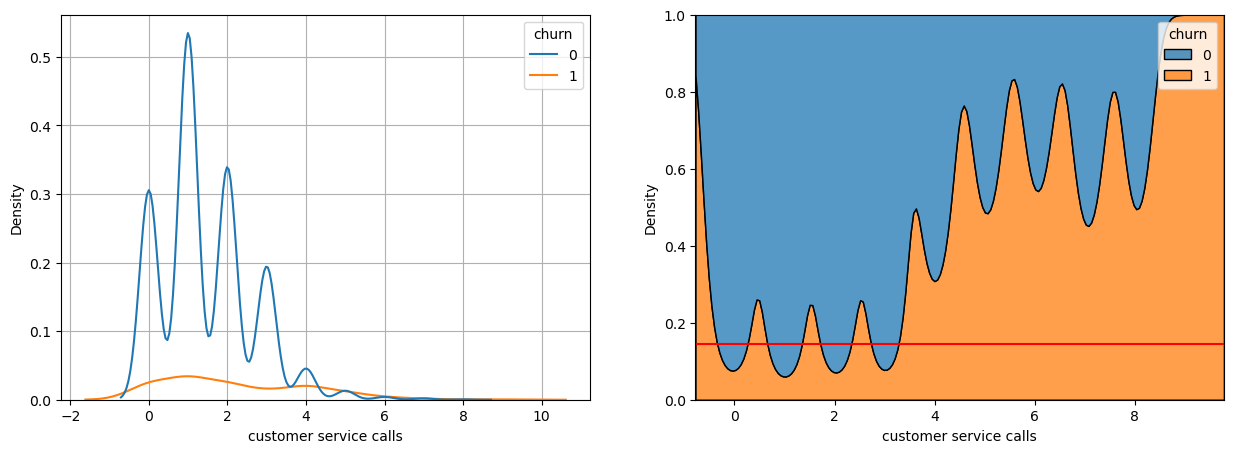

In [18]:
# kde 그래프 분석
eda_int(data ,'customer service calls','churn')

In [19]:
log_reg_anal(data,"customer service calls", "churn")

Optimization terminated successfully.
         Current function value: 0.394125
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                 0.04751
Time:                        17:55:04   Log-Likelihood:                -1313.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 2.404e-30
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.4902      0.086    -28.849      0.000      -2.659      

In [20]:
# CS 연락이 4회 이상일 때 이탈자 비율 계산
cs_above_4 = data[data['customer service calls'] >= 4]

churn_count = cs_above_4[cs_above_4['churn'] == 1].shape[0]
total_count = cs_above_4.shape[0]
churn_rate = churn_count / total_count if total_count > 0 else 0

# 결과 출력
print(f"CS 연락 4회 이상일 때의 이탈자 비율: {churn_rate:.2%}")

CS 연락 4회 이상일 때의 이탈자 비율: 51.69%


***

* CS 연락 횟수는 이탈율과 관련이 있다
  > 0~3번은 이탈율이 평균보다 낮지만 4번 이상부터 점점 이탈율이 높아진다.

H0 : CS 연락 횟수가 많은 고객은 이탈율에 영향을 주지 않을 것이다.  
H1 : CS 연락 횟수가 많은 고객은 이탈율에 영향을 줄 것이다.


→ 유의미한 관계와 정보  <span style="color:blue">**가설3 채택**</span>

***

다른 컬럼 분석하기

,count,mean,std,min,25%,50%,75%,max
app transactions,3333.0,4.479448,2.461214,0.0,3.0,4.0,6.0,20.0


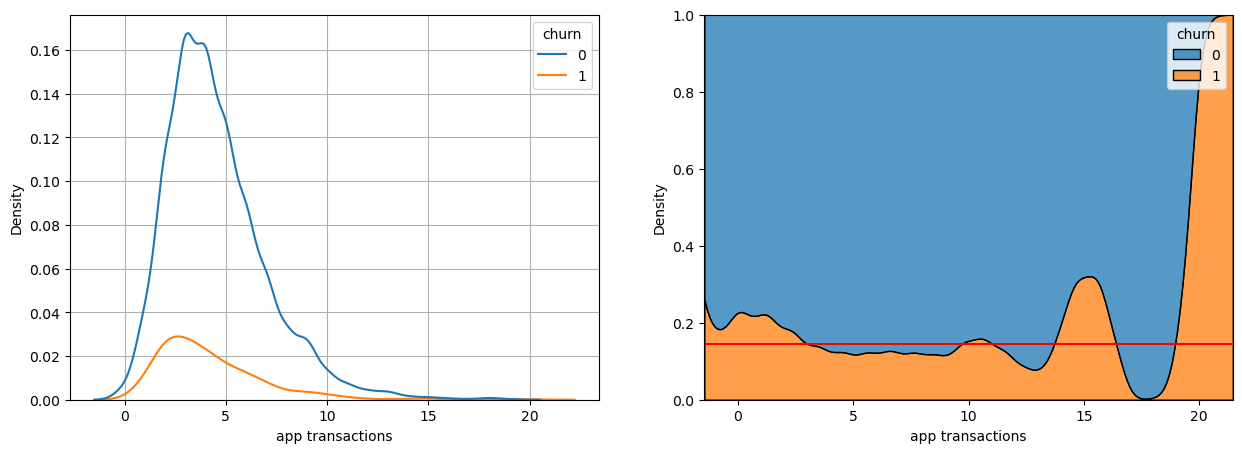

,count,mean,std,min,25%,50%,75%,max
desktop transactions,3333.0,17.087609,4.323795,0.0,14.0,17.0,20.0,31.0


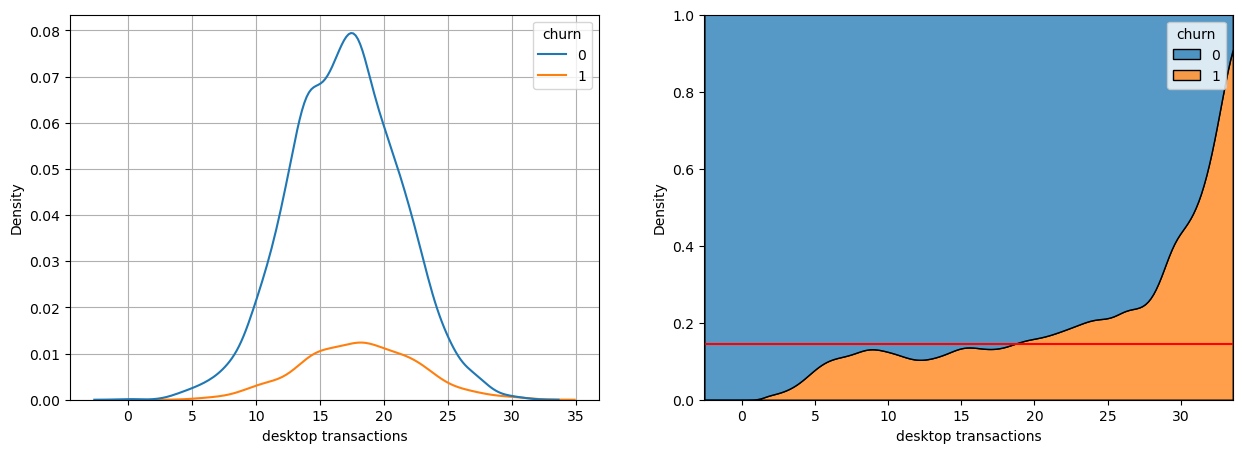

,count,mean,std,min,25%,50%,75%,max
session duration,3333.0,201.039604,50.714359,0.0,167.0,201.0,235.0,364.0


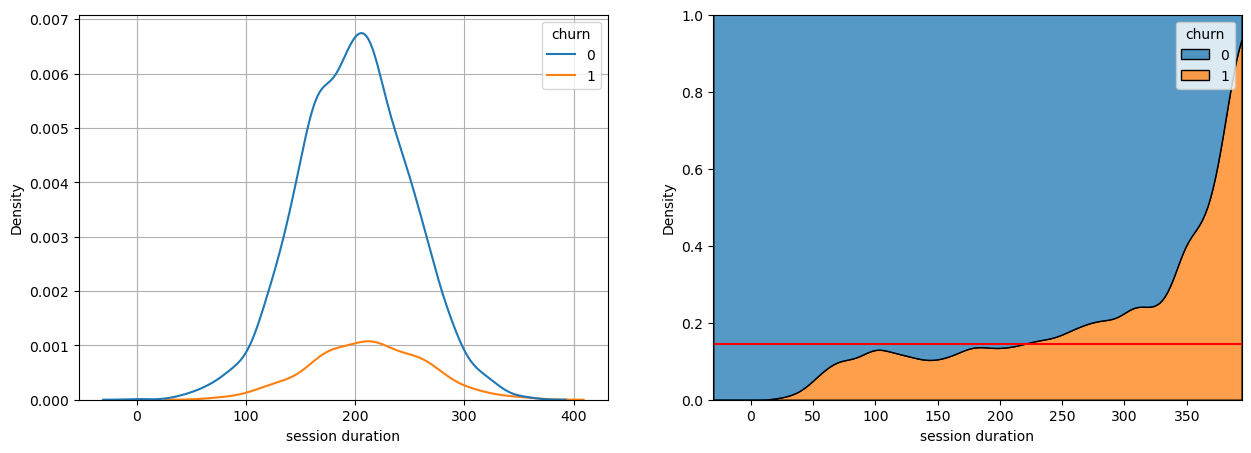

In [21]:
eda_int(data ,'app transactions','churn')
eda_int(data ,'desktop transactions','churn')
eda_int(data ,'session duration','churn')

- 대부분의 그래프가 이용을 너무 많이 했을 때 이탈율이 높은것을 볼수 있다.

,count,mean,std,min,25%,50%,75%,max
add to wishlist,3333.0,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0


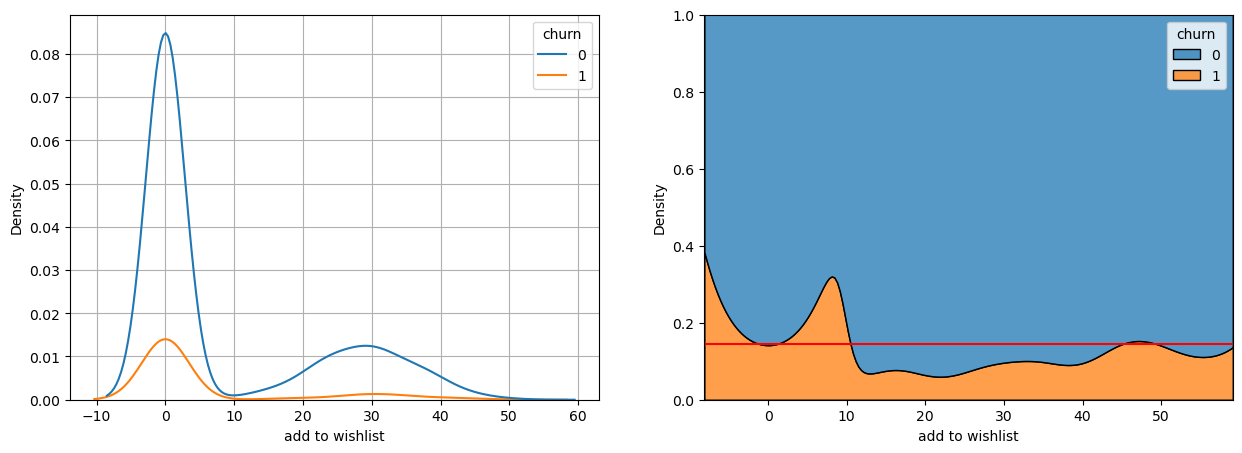

,count,mean,std,min,25%,50%,75%,max
sale product views,3333.0,100.107711,19.568609,33.0,87.0,100.0,113.0,175.0


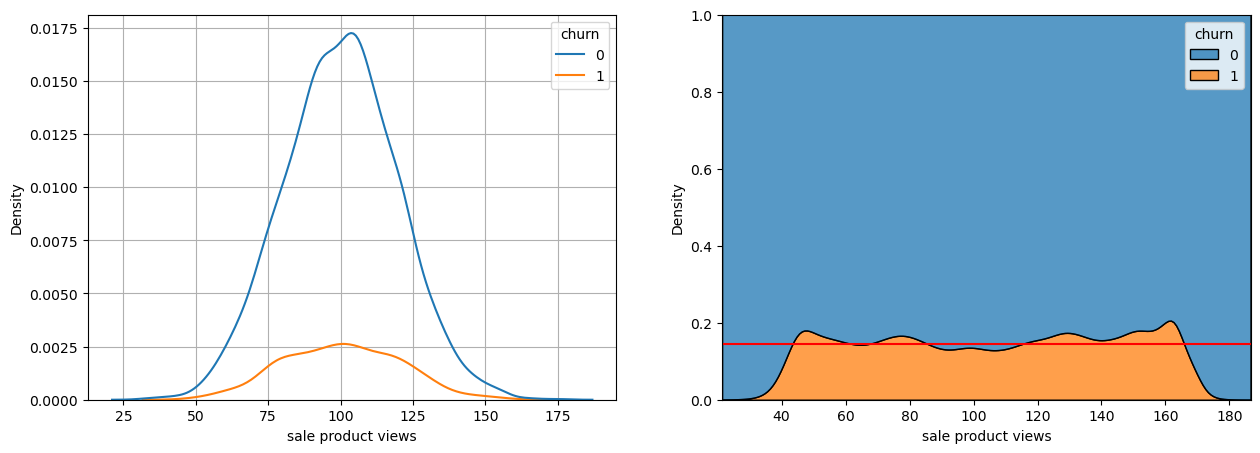

,count,mean,std,min,25%,50%,75%,max
discount rate per visited products,3333.0,9.039325,2.275873,1.04,7.52,9.05,10.59,17.77


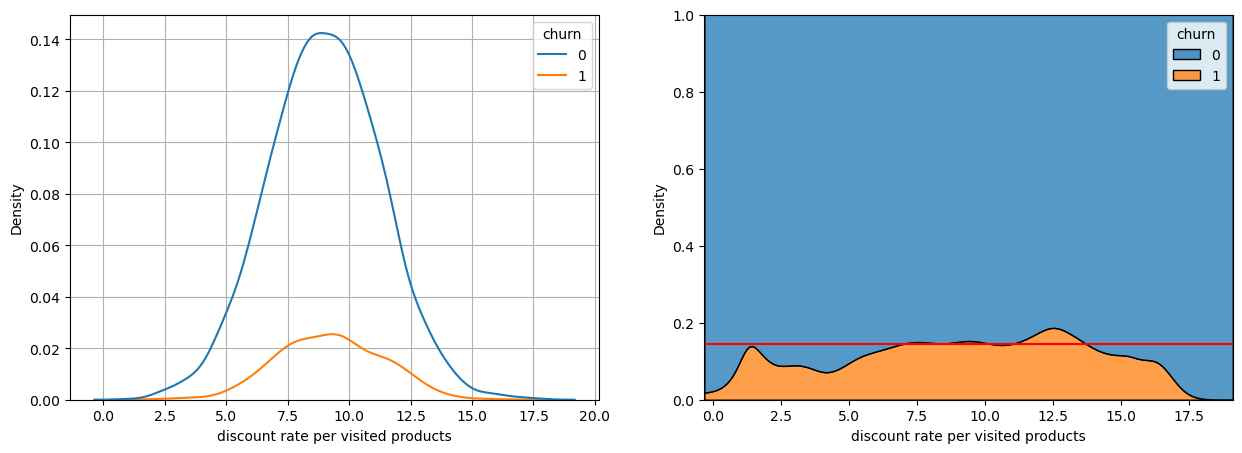

In [22]:
eda_int(data ,'add to wishlist','churn')
eda_int(data ,'sale product views','churn')
eda_int(data ,'discount rate per visited products','churn')

- 위시리스트에 항목이 0~10개까지일 때 이탈율이 평균보다 높다.
- 할인율과 관련돼서는 이탈율과 상관이 없어 보인다.

,count,mean,std,min,25%,50%,75%,max
total product detail views,3333.0,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0


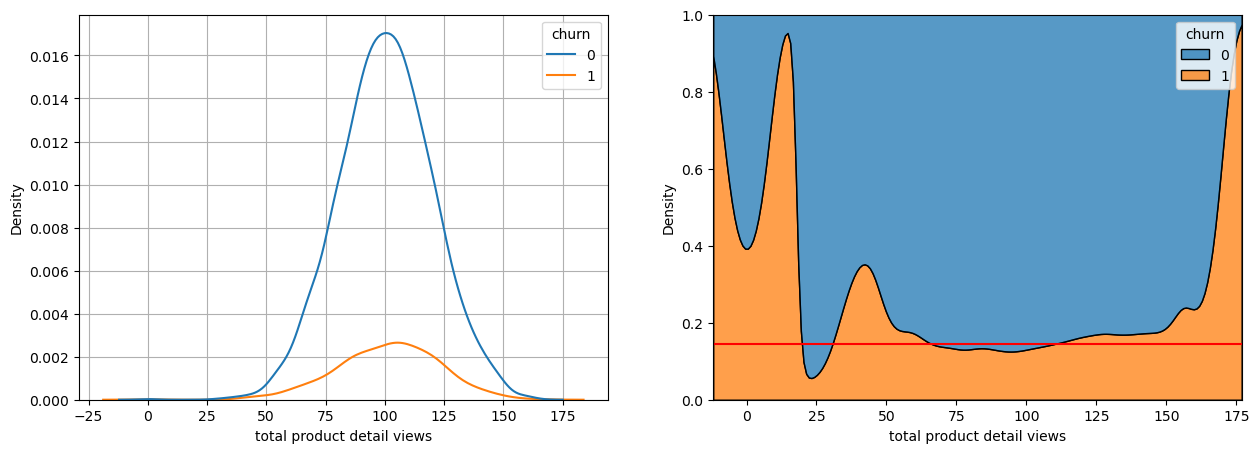

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0


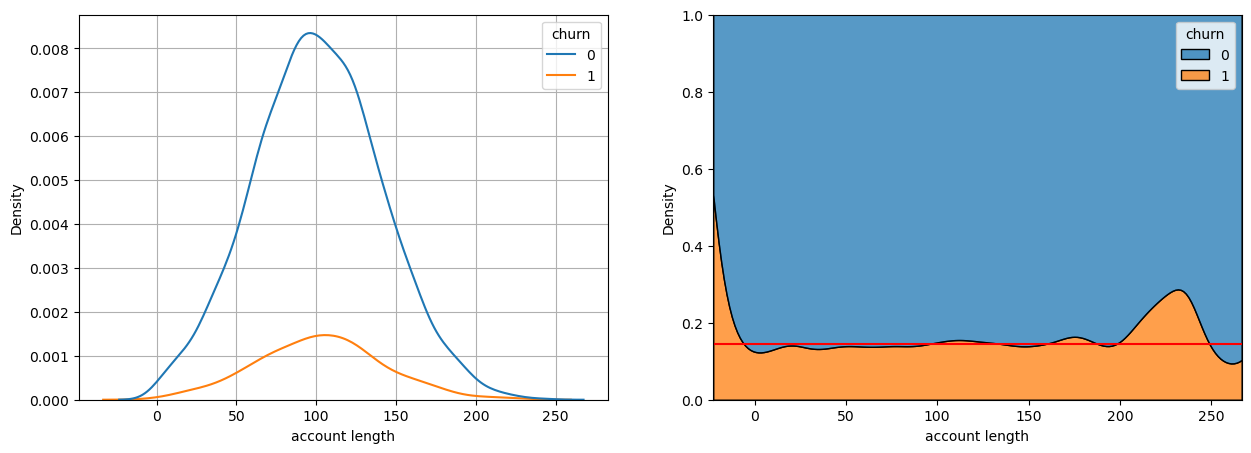

In [23]:
eda_int(data ,'total product detail views','churn')
eda_int(data ,'account length','churn')

- 총 제품 상세 조회가 0~20회까지 이탈율이 매우 높다
- 사용자 계정의 사용 기간이 200개월이 넘어야 이탈율이 평균보다 높다.

### 범주형
>시각화 - mosaic
>
>수치화 - 카이제곱 검정

In [24]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

Chi2ContingencyResult(statistic=222.5657566499376, pvalue=2.4931077033159556e-50, dof=1, expected_freq=array([[2573.80738074,  436.19261926],
       [ 276.19261926,   46.80738074]]))


(<Figure size 640x480 with 3 Axes>,
 {('no', '0'): (0.0, 0.0, 0.8985973224188091, 0.8821094689904084),
  ('no', '1'): (0.0,
   0.885431728126621,
   0.8985973224188091,
   0.1145682718733789),
  ('yes', '0'): (0.9035724467969185,
   0.0,
   0.09642755320308156,
   0.573938265636732),
  ('yes', '1'): (0.9035724467969185,
   0.5772605247729445,
   0.09642755320308156,
   0.4227394752270553)})

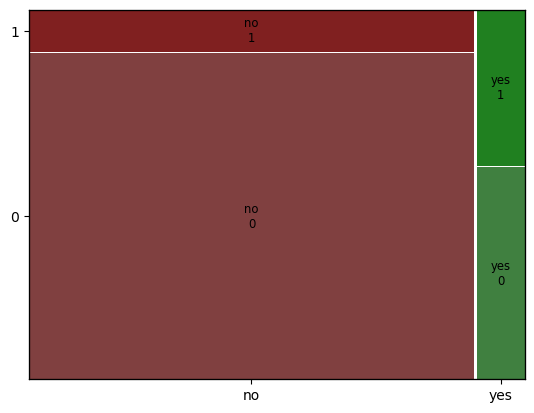

In [25]:
# 신용카드 정보 저장 여부
temp = pd.crosstab(data['credit card info save'], data['churn'])
ok = chi2_contingency(temp)
print(ok)
mosaic(data, ['credit card info save','churn'])

Chi2ContingencyResult(statistic=34.13166001075673, pvalue=5.15063965903898e-09, dof=1, expected_freq=array([[2061.61116112,  349.38883888],
       [ 788.38883888,  133.61116112]]))


(<Figure size 640x480 with 3 Axes>,
 {('yes', '0'): (0.0, 0.0, 0.2752514057375887, 0.9101981104200747),
  ('yes', '1'): (0.0,
   0.9135203695562873,
   0.2752514057375887,
   0.08647963044371258),
  ('no', '0'): (0.2802265301156982,
   0.0,
   0.7197734698843019,
   0.8300824984050125),
  ('no', '1'): (0.2802265301156982,
   0.833404757541225,
   0.7197734698843019,
   0.16659524245877488)})

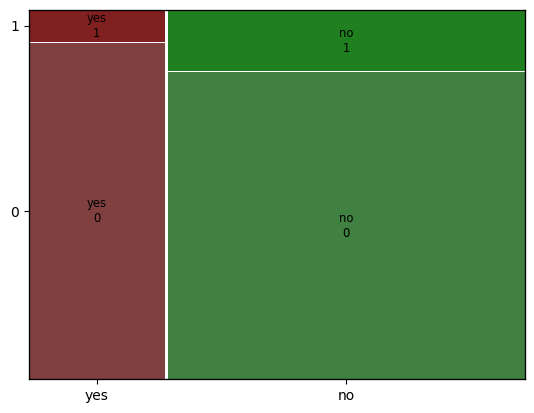

In [26]:
# 푸시 알림 활성화 여부
temp = pd.crosstab(data['push status'], data['churn'])
ok = chi2_contingency(temp)
print(ok)
mosaic(data, ['push status','churn'])

- 신용 카드 정보 저장 여부와 푸시 알림 활성화 여부 둘 모두 이탈율과 유의미한 관계가 있다.

****

보너스 궁금한 점 
1. 신용카드 정보 저장했을 때 구매 건수가 높을까?24. 푸시 알림을 활성화 했을때 프로모션 클릭 수가 높을까?

In [27]:
import scipy.stats as spst

T-statistic: -0.9445
P-value: 0.3455


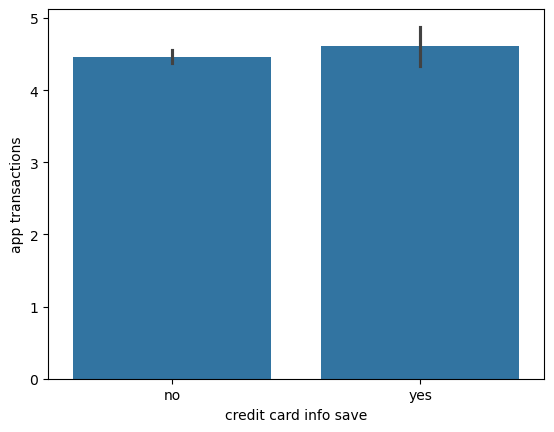

In [28]:
# 1번
sns.barplot(x='credit card info save', y='app transactions' , data= data)

A = data[data['credit card info save'] == 'yes']['app transactions']  # 정보 저장 고객
B = data[data['credit card info save'] == 'no']['app transactions']  # 정보 미저장 고객

# 독립 표본 t-검정 수행
t_stat, p_value = spst.ttest_ind(B, A, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.3903
P-value: 0.6964


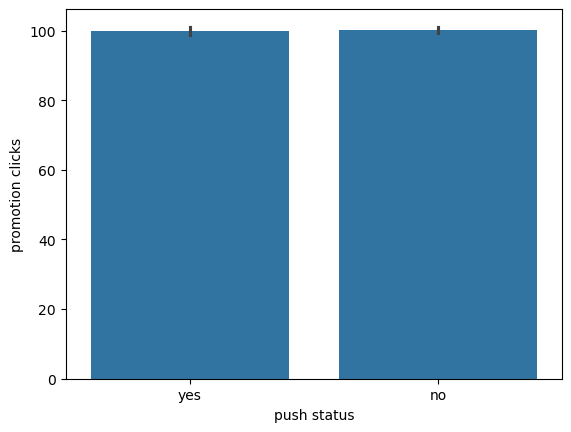

In [29]:
# 2번
sns.barplot(x='push status', y='promotion clicks' , data= data)

A = data[data['push status'] == 'yes']['promotion clicks']  # 알림 활성화 고객
B = data[data['push status'] == 'no']['promotion clicks']  # 알림 비활성화 고객

# 독립 표본 t-검정 수행
t_stat, p_value = spst.ttest_ind(B, A, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

- 관련이 없었다!

---

## RFM 모방 분석

### RFM 사용한 이유
직접 커스텀 분석하는 것 보다 E커머스 시장에서 꽤 신뢰성이 있는 RFM 분석 기법을 사용한다.  



현재 여러 컬럼이 이탈율에 큰 영향을 끼치지 않는다. 고객 세분화를 통해 등급을 나눈 후 등급별 이탈 원인을 찾아보고자 한다.(RFM에 사용할 컬럼이 없으므로 아래와 같이 대체한다)

Recency (R): 마지막 구매 후 경과 시간  
> **AccountLength (계정 사용 기간)**

Frequency (F): 일정 기간 내 구매 횟수 
> **AppTransactions + DesktopTransactions (총 구매 횟수)**

Monetary (M): 일정 기간 내 총 구매 금액 
>**AvgOrderValue * (AppTransactions + DesktopTransactions) (총 구매 금액)**

In [30]:
# RFM 값 계산
data['R'] = data['account length']
data['F'] = data['app transactions'] + data['desktop transactions']
data['M'] = data['F'] * data['avg order value']

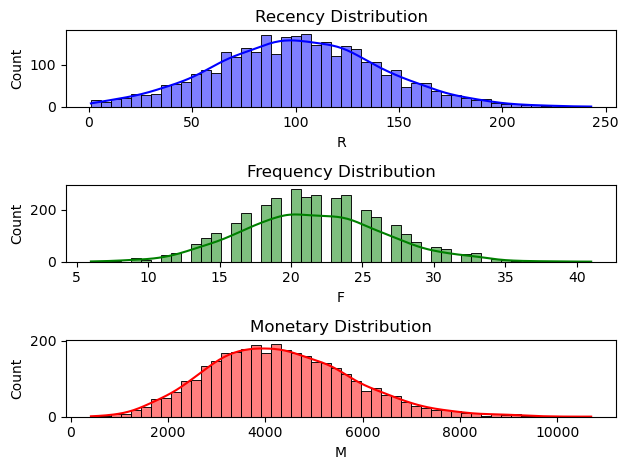

In [31]:
# 시각화
plt.subplot(3, 1, 1)
sns.histplot(data['R'], bins=50, kde=True, color='blue')
plt.title('Recency Distribution')

plt.subplot(3, 1, 2)
sns.histplot(data['F'], bins=50, kde=True, color='green')
plt.title('Frequency Distribution')

plt.subplot(3, 1, 3)
sns.histplot(data['M'], bins=50, kde=True, color='red')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [32]:
# K-Means 클러스터링 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['R', 'F', 'M']])

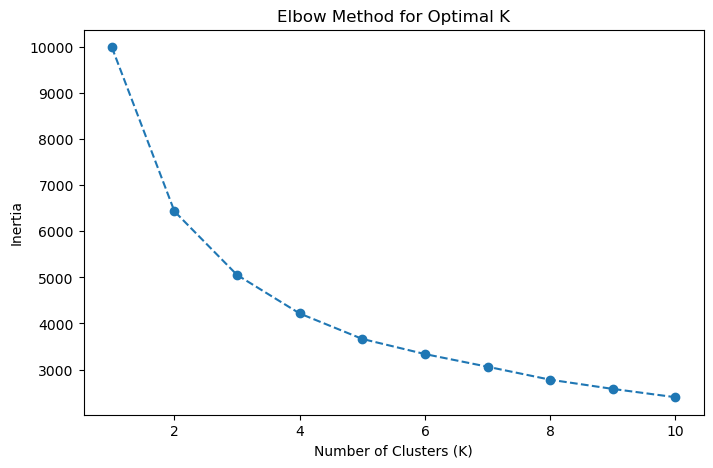

In [33]:
# 엘보 메소드 활용하여 최적 K 찾기
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [34]:
# 최적 K 선택 후 클러스터링 적용
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [35]:
# CV(변동계수) 기반 가중치 계산
cv_r = np.std(data['R']) / np.mean(data['R'])
cv_f = np.std(data['F']) / np.mean(data['F'])
cv_m = np.std(data['M']) / np.mean(data['M'])

# 전체 CV 합으로 가중치 계산
total_cv = cv_r + cv_f + cv_m
w_R = cv_r / total_cv
w_F = cv_f / total_cv
w_M = cv_m / total_cv

# 최종 가중 RFM 점수 계산
data['Weighted_RFM'] = (w_R * data['R']) + (w_F * data['F']) + (w_M * data['M'])

In [36]:
# 결과 출력
print("Calculated Weights: w_R =", round(w_R, 3), ", w_F =", round(w_F, 3), ", w_M =", round(w_M, 3))
print("===========================================================")
print(data[['user id', 'R', 'F', 'M', 'Cluster', 'Weighted_RFM']])

Calculated Weights: w_R = 0.408 , w_F = 0.239 , w_M = 0.353
      user id    R   F       M  Cluster  Weighted_RFM
0     3824657  128  20  4894.0        0   1785.714836
1     3717191  107  20  5088.0        0   1845.676822
2     3581921  137  15  2439.0        1    921.001160
3     3759999   84  12  2362.8        1    871.750449
4     3306626   75  16  2990.4        2   1090.724916
...       ...  ...  ..     ...      ...           ...
3328  4144276  192  24  6698.4        0   2450.150586
3329  3703271   68  17  3252.1        2   1180.550059
3330  3288230   28  31  5948.9        3   2120.181506
3331  3646381  184  24  3340.8        0   1260.868135
3332  4004344   74  27  6517.8        3   2338.943386

[3333 rows x 6 columns]


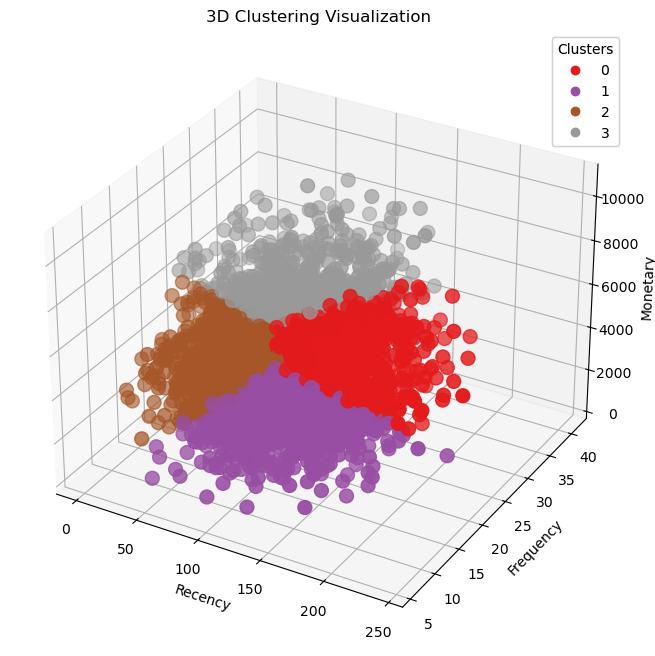

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 시각화: 각 축에 R, F, M을 사용
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터별로 색상 지정
scatter = ax.scatter(data['R'], data['F'], data['M'], c=data['Cluster'], cmap='Set1', s=100)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Clustering Visualization')

# 범례 추가
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


**제대로 된 RFM이 아니다 보니 세분화가 잘 되지는 않았다.**

In [38]:
data.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,color,R,F,M,Cluster,Weighted_RFM
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,blue,128,20,4894.0,0,1785.714836
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,blue,107,20,5088.0,0,1845.676822
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,blue,137,15,2439.0,1,921.001160
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,blue,84,12,2362.8,1,871.750449
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,blue,75,16,2990.4,2,1090.724916


In [39]:
data = data.drop(columns=['color','Weighted_RFM'])

In [40]:
# 이탈자 데이터 필터링
churn_data = data[data['churn'] == 1]

# 클러스터별 이탈자 비율 계산
cluster_churn_rate = churn_data.groupby('Cluster').size() / data.groupby('Cluster').size()

# 각 클러스터의 TOP3 특성 (상위 3개 특징 분석)
top_features = {}
columns_to_analyze = data.columns.tolist()

for cluster in range(optimal_k):
    cluster_data = churn_data[churn_data['Cluster'] == cluster]
    
    # 각 클러스터의 이탈자 비율
    churn_count = cluster_data.shape[0]
    total_count = data[data['Cluster'] == cluster].shape[0]
    churn_rate = churn_count / total_count
    
    # 각 클러스터의 특성 분석 (상관분석이나 중요 변수 기반으로 TOP3 추출)
    correlation = cluster_data[columns_to_analyze].corr(numeric_only=True)    
    
    # 이탈자들과 관련된 변수들의 상관계수 또는 중요 특성 추출
    top_features[cluster] = correlation.abs().nlargest(3, 'R')['R'].index.tolist()  # 예시로 'R' 변수에 대한 상관성으로 TOP3 추출
    
    print(f"{cluster}등급: {total_count}명 중 {churn_count}명이 이탈, 이탈 비율: {churn_rate:.2%}")
    print(f"{cluster}등급 이탈자의 TOP3 특징: {top_features[cluster]}")
    


0등급: 884명 중 131명이 이탈, 이탈 비율: 14.82%
0등급 이탈자의 TOP3 특징: ['account length', 'R', 'F']
1등급: 782명 중 108명이 이탈, 이탈 비율: 13.81%
1등급 이탈자의 TOP3 특징: ['account length', 'R', 'customer service calls']
2등급: 1000명 중 130명이 이탈, 이탈 비율: 13.00%
2등급 이탈자의 TOP3 특징: ['account length', 'R', 'F']
3등급: 667명 중 114명이 이탈, 이탈 비율: 17.09%
3등급 이탈자의 TOP3 특징: ['account length', 'R', 'F']


---

이탈자의 대부분의 계정 기간이 중요하다 확인해보자.

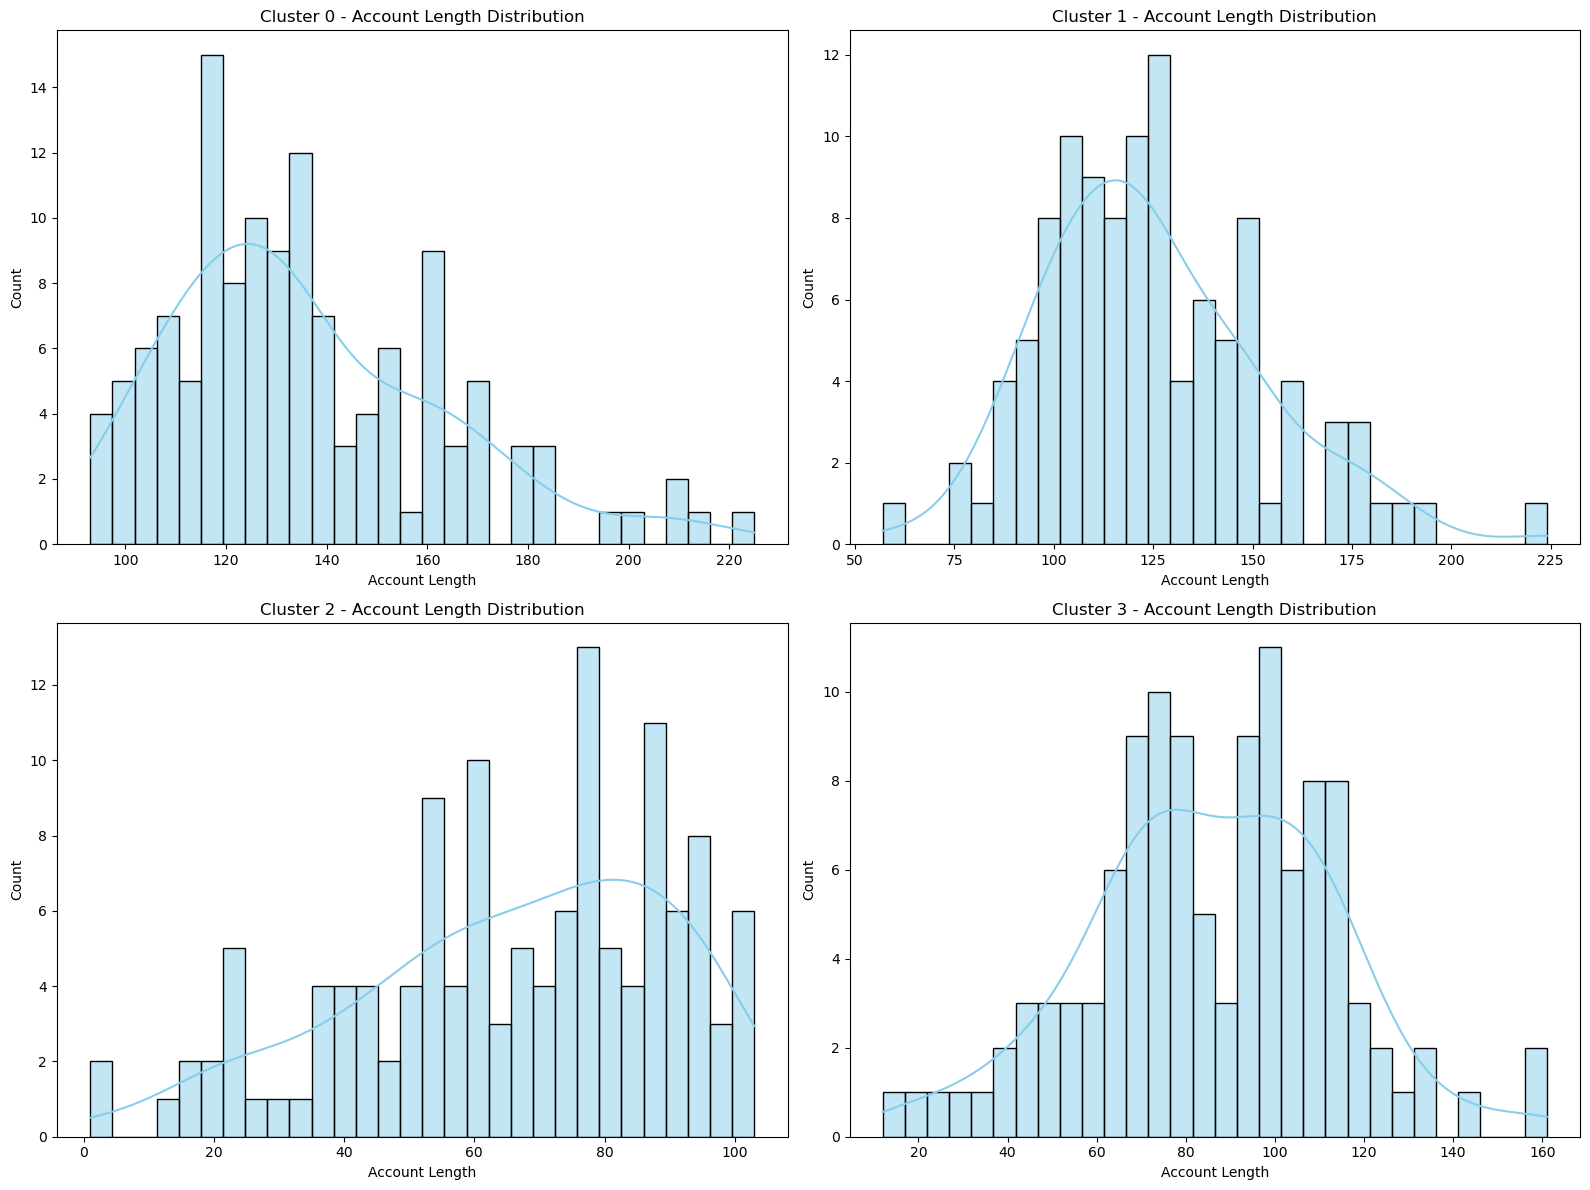

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

for cluster in range(optimal_k):

    cluster_churn_data = churn_data[churn_data['Cluster'] == cluster]
    
    plt.subplot(2, 2, cluster+1)
    sns.histplot(cluster_churn_data['account length'], kde=True, color='skyblue', bins=30)
    plt.title(f'Cluster {cluster} - Account Length Distribution')
    plt.xlabel('Account Length')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

0등급 : 100개월 이상에서 가장 큰 이탈율을 보임  
1등급 : 50개월 이상부터 전체적으로 고루 분포, 또 CS관리를 잘해야 함   
2등급 : 보통 0~100개월에 이탈자 분포  
3등급 : 전체적으로 고루 분포 되어있으며 정규분포를 따름  

In [43]:
data.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,R,F,M,Cluster
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,128,20,4894.0,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,107,20,5088.0,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,137,15,2439.0,1
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,84,12,2362.8,1
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,75,16,2990.4,2


In [45]:
data.to_csv("hi.csv",index=False)

---

# 분석 정리

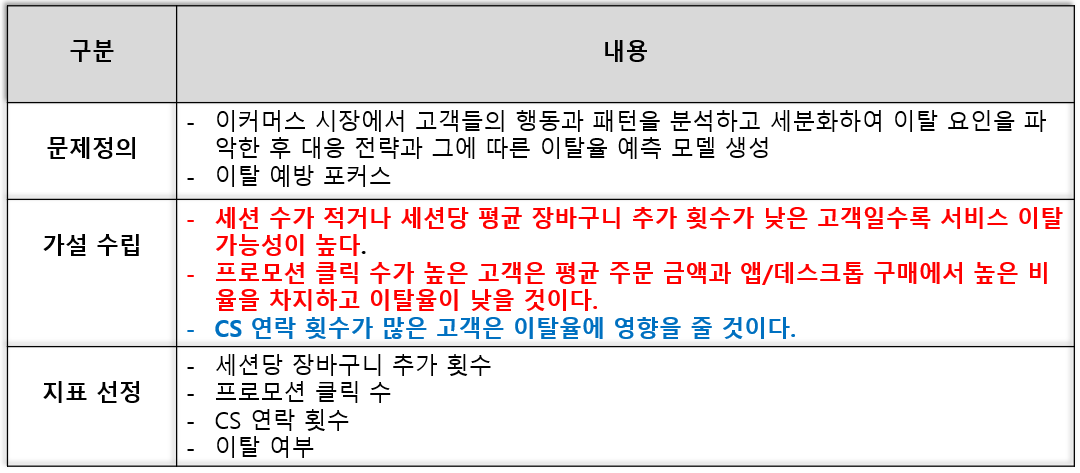

* 빨간색 > 가설 기각
* 파란색 > 가설 채택

## 제안

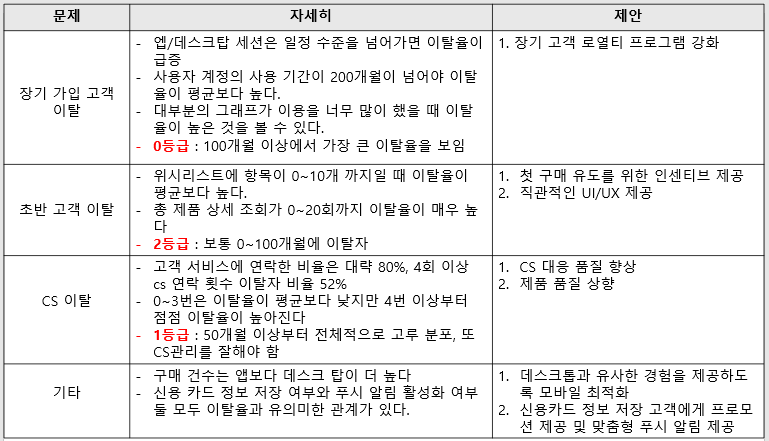

* 제한된 정보(컬럼)으로 인해 제안이 구체적이지는 못하다.

# +이탈 예측 모델 만들기

## 모델 정리

모델링을 위한 다중 공선성 해결

data_1  >> 사용자 임의 컬럼 지정  
data_2  >> 변수 중요도 상위 컬럼 지정  
data_3  >> PCA 기법  

## data_1 구하기


In [42]:
data.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,R,F,M,Cluster
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,128,20,4894.0,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,107,20,5088.0,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,137,15,2439.0,1
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,84,12,2362.8,1
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,75,16,2990.4,2


In [183]:
# add to cart per session <-> product detail view per app session
# add to cart per session은 이탈율과 유의미한 관계이므로 뒤에것 삭제
data_1 = data.drop('product detail view per app session',axis=1)

In [184]:
# app session <-> desktop session  
# app session과 desktop session의 경우 이탈율과 관계가 적으며 필요한 정보도 분석 했으므로
# 합하여 total session 으로 바꾸어 다중 공선성 문제 해결
data_1['total sessions']= data['app sessions'] + data['desktop sessions']

In [186]:
# session duration <-> desktop transactions
# session duration은 현 상황에서 이탈율과 큰 관련이 없으므로 제거
data_1 = data_1.drop('session duration',axis=1)

In [187]:
# discount rate per visited products <-> avg order value 
# 할인율은 이탈율과 상관이 없으므로 제거
data_1 = data_1.drop('discount rate per visited products',axis=1)

In [188]:
# RFM 생성하면서 생성된 컬럼 제거 
data_1 = data_1.drop(columns=['R','F','M'])

In [189]:
# 나머지 제거
data_1 = data_1.drop(columns=['location code'
                          ,'user id','desktop sessions','app sessions'])

In [192]:
data_1.head(5)

,account length,credit card info save,push status,add to wishlist,desktop transactions,total product detail views,promotion clicks,avg order value,sale product views,app transactions,add to cart per session,customer service calls,churn,Cluster,total sessions
0,128,no,yes,25,17,110,87,244.7,91,3,2.70,1,0,0,310
1,107,no,yes,26,17,123,103,254.4,103,3,3.70,1,0,0,189
2,137,no,no,0,10,114,110,162.6,104,5,3.29,0,0,1,284
3,84,yes,no,0,5,71,88,196.9,89,7,1.78,2,0,1,350
4,75,yes,no,0,13,113,122,186.9,121,3,2.73,3,0,2,195


## data 2 구하기

In [200]:
# data 2 구하기
!pip install xgboost

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [205]:
data_2 = pd.get_dummies(data, columns=['credit card info save',
                                             'push status',], drop_first=True)


In [206]:
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = data_2.drop(columns=['churn'])  # 타겟 변수 제외
y = data_2['churn']  # 이탈 여부 (타겟 변수)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류
    eval_metric='logloss',  # 평가 지표 (로그 손실)
    use_label_encoder=False
)

model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.9580
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       566
           1       0.94      0.77      0.85       101

    accuracy                           0.96       667
   macro avg       0.95      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



C:\Users\whgus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:56:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                Feature  Importance
21            credit card info save_yes    0.179397
16               customer service calls    0.136467
3                       add to wishlist    0.102253
14                     app transactions    0.088730
4                      desktop sessions    0.078544
5                          app sessions    0.063928
13  product detail view per app session    0.048502
8                      session duration    0.046446
19                                    M    0.035776
6                  desktop transactions    0.035563
18                                    F    0.029683
10                      avg order value    0.022563
12   discount rate per visited products    0.021317
2                               user id    0.018385
11                   sale product views    0.017906
0                        account length    0.016789
7            total product detail views    0.015407
20                              Cluster    0.014862
9           

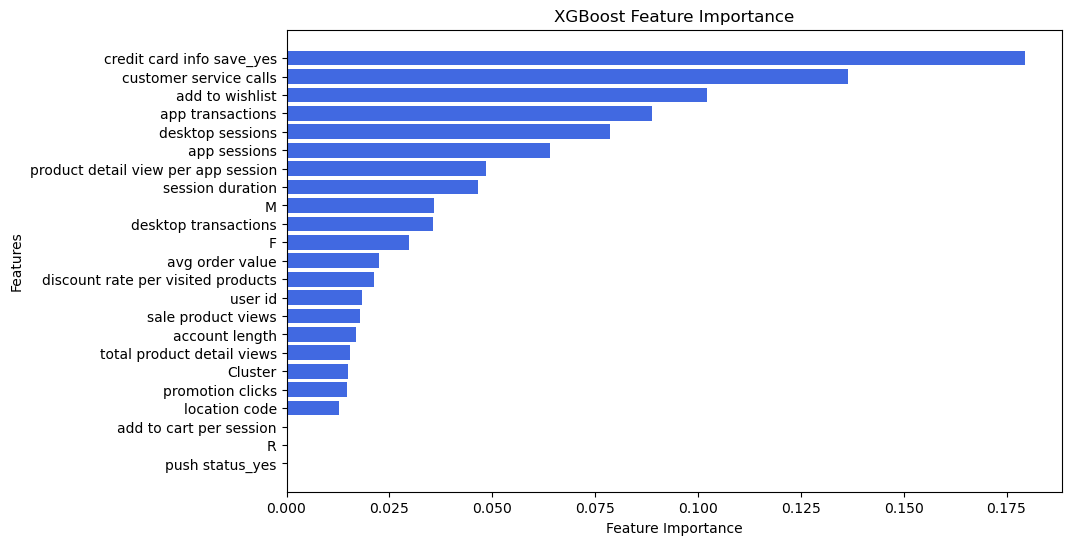

In [207]:
# XGBoost에서 제공하는 변수 중요도 가져오기
feature_importance = model.feature_importances_

# 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 변수가 위로 오게 정렬
plt.show()

In [209]:
data_2.head(5)

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,R,F,M,Cluster,credit card info save_yes,push status_yes
0,128,415,3824657,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,128,20,4894.0,0,False,True
1,107,415,3717191,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,107,20,5088.0,0,False,True
2,137,415,3581921,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,137,15,2439.0,1,False,False
3,84,408,3759999,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,84,12,2362.8,1,True,False
4,75,415,3306626,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,75,16,2990.4,2,True,False


In [210]:
# 중요도 0.03 이상인 변수만 선택
selected_features = importance_df[importance_df['Importance'] >= 0.03]['Feature'].tolist()

# 새로운 데이터셋 생성
data_2 = data_2[selected_features + ['churn']]  # 타겟 변수 포함

In [211]:
data_2.head(5)

,credit card info save_yes,customer service calls,add to wishlist,app transactions,desktop sessions,app sessions,product detail view per app session,session duration,M,desktop transactions,churn
0,False,1,25,3,265,45,10.0,197,4894.0,17,0
1,False,1,26,3,162,27,13.7,196,5088.0,17,0
2,False,0,0,5,243,41,12.2,121,2439.0,10,0
3,True,2,0,7,299,51,6.6,62,2362.8,5,0
4,True,3,0,3,167,28,10.1,148,2990.4,13,0


## data3 구하기

In [219]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. 범주형 변수 처리
data_dummies = pd.get_dummies(data, drop_first=True)

# 2. 'churn' 컬럼 분리
X = data_dummies.drop(columns=['churn'])
y = data_dummies['churn']

# 3. 표준화 (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA 적용 (설명력 95% 이상 유지)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 5. 변환된 데이터를 DataFrame으로 변환
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
data_3 = pd.DataFrame(X_pca, columns=pca_columns)

# 6. 'churn' 컬럼 추가
data_3['churn'] = y.values

# 결과 확인
print(f"원래 변수 개수: {X.shape[1]}, PCA 변환 후 변수 개수: {X_pca.shape[1]}")
print("data_3 샘플:")
print(data_3.head())


원래 변수 개수: 23, PCA 변환 후 변수 개수: 14
data_3 샘플:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.099990  1.153736 -1.789395  1.518544 -1.325121  2.020304 -0.664908   
1  0.073414  0.519940 -1.698483 -1.726396 -0.845450  1.999181 -0.641286   
2 -3.170751  0.694373 -0.321530  0.473524 -1.806309 -0.786930  1.145061   
3 -3.722308 -1.654901 -1.076694  3.440926 -1.422734 -0.518335  1.837706   
4 -1.753437 -1.436996  0.259866 -0.148442 -0.158785 -0.797756  0.059667   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  churn  
0 -1.041904 -0.164308  0.244082  0.165753  0.684835  0.011446 -0.176439      0  
1 -0.901687 -0.478142 -0.488291  0.531404 -0.038610 -0.622121  0.075772      0  
2 -0.816116 -0.935916 -0.664317 -0.094140 -0.212108 -0.269116 -0.336623      0  
3  1.709259 -0.050466  0.637606 -0.174548  1.072072  2.294224  1.964592      0  
4  1.532986 -1.093771 -0.630950  0.898164 -1.162567  0.059661  3.235885      0  


In [220]:
data_3.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,churn
0,-0.099990,1.153736,-1.789395,1.518544,-1.325121,2.020304,-0.664908,-1.041904,-0.164308,0.244082,0.165753,0.684835,0.011446,-0.176439,0
1,0.073414,0.519940,-1.698483,-1.726396,-0.845450,1.999181,-0.641286,-0.901687,-0.478142,-0.488291,0.531404,-0.038610,-0.622121,0.075772,0
2,-3.170751,0.694373,-0.321530,0.473524,-1.806309,-0.786930,1.145061,-0.816116,-0.935916,-0.664317,-0.094140,-0.212108,-0.269116,-0.336623,0
3,-3.722308,-1.654901,-1.076694,3.440926,-1.422734,-0.518335,1.837706,1.709259,-0.050466,0.637606,-0.174548,1.072072,2.294224,1.964592,0
4,-1.753437,-1.436996,0.259866,-0.148442,-0.158785,-0.797756,0.059667,1.532986,-1.093771,-0.630950,0.898164,-1.162567,0.059661,3.235885,0


# 모델링

로지스틱 회귀 - 기본적인 모델 채택  
XG 부스트 - 그래디언트 부스팅 알고리즘 채택  
캣 부스트 - 그라디언트 부스팅 중 좋은 성능  
랜덤 포레스트 - 앙상블 알고리즘 채택  

In [224]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 435.7 kB/s eta 0:03:54
   ---------------------------------------- 0.3/101.7 MB 2.3 MB/s eta 0:00:46
   ---------------------------------------- 0.4/101.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.6/101.7 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 1.0/101.7 MB 3.9 MB/s eta 0:00:27
    --------------------------------------- 1.3/101.7 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.6/101.7 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 1.9/101.7 MB 4.8 MB/s eta 0:00:22
    --------------------------------------- 2.2/101.7 MB 4.9 MB/s eta 0:00:21
   - -------------------------------------- 2.6/101.7 MB 5.1 MB/s eta 0:00:20
   - -------------------------------------- 2.6/101.7 MB 4.9 MB/s eta 0:00:2

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

def modeling(model_type, data):

    data = pd.get_dummies(data, drop_first=True)
    # 타겟 변수와 특성 분리
    X = data.drop(columns=['churn'])  # 'churn' 제외
    y = data['churn']  # 타겟 변수

    # 훈련/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 모델 선택
    if model_type == "RF":
        model = RandomForestClassifier(random_state=42)
        model_name = "Random Forest"
    elif model_type == "XG":
        model = XGBClassifier(objective='binary:logistic', use_label_encoder=False, random_state=42)
        model_name = "XGBoost"
    elif model_type == "CAT":
        model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_state=42, verbose=0)
        model_name = "CatBoost"
    elif model_type == "LOG":
        model = LogisticRegression(random_state=42)
        model_name = "Logistic Regression"
    else:
        print("Invalid model type. Please choose from 'RF', 'XG', 'CAT', or 'LOG'.")
        return

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # 결과 출력
    print(f"{model_name} 성능:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(report)

In [229]:
# data_1
modeling("RF", data_1)  
modeling("XG", data_1) 
modeling("CAT", data_1) 
modeling("LOG", data_1)

Random Forest 성능:
Accuracy: 0.9385
AUC: 0.8174
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.93      0.64      0.76       101

    accuracy                           0.94       667
   macro avg       0.93      0.82      0.86       667
weighted avg       0.94      0.94      0.93       667

XGBoost 성능:
Accuracy: 0.9520
AUC: 0.8701
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.92      0.75      0.83       101

    accuracy                           0.95       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.95      0.95       667



C:\Users\whgus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:24:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost 성능:
Accuracy: 0.9580
AUC: 0.8817
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       566
           1       0.94      0.77      0.85       101

    accuracy                           0.96       667
   macro avg       0.95      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667

Logistic Regression 성능:
Accuracy: 0.8456
AUC: 0.5430
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       566
           1       0.46      0.11      0.18       101

    accuracy                           0.85       667
   macro avg       0.66      0.54      0.55       667
weighted avg       0.80      0.85      0.80       667



C:\Users\whgus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [230]:
# data_2
modeling("RF", data_2)  
modeling("XG", data_2) 
modeling("CAT", data_2) 
modeling("LOG", data_2)

Random Forest 성능:
Accuracy: 0.9550
AUC: 0.8800
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.92      0.77      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.95      0.96      0.95       667

XGBoost 성능:
Accuracy: 0.9625
AUC: 0.8966
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.94      0.80      0.87       101

    accuracy                           0.96       667
   macro avg       0.95      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667



C:\Users\whgus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost 성능:
Accuracy: 0.9625
AUC: 0.8966
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.94      0.80      0.87       101

    accuracy                           0.96       667
   macro avg       0.95      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667

Logistic Regression 성능:
Accuracy: 0.8456
AUC: 0.4982
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



C:\Users\whgus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [231]:
# data_3
modeling("RF", data_3)  
modeling("XG", data_3) 
modeling("CAT", data_3) 
modeling("LOG", data_3)

Random Forest 성능:
Accuracy: 0.8966
AUC: 0.6788
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       566
           1       0.88      0.37      0.52       101

    accuracy                           0.90       667
   macro avg       0.89      0.68      0.73       667
weighted avg       0.90      0.90      0.88       667

XGBoost 성능:
Accuracy: 0.9235
AUC: 0.7760
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.89      0.56      0.69       101

    accuracy                           0.92       667
   macro avg       0.91      0.78      0.82       667
weighted avg       0.92      0.92      0.92       667



C:\Users\whgus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost 성능:
Accuracy: 0.9235
AUC: 0.7760
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.89      0.56      0.69       101

    accuracy                           0.92       667
   macro avg       0.91      0.78      0.82       667
weighted avg       0.92      0.92      0.92       667

Logistic Regression 성능:
Accuracy: 0.8531
AUC: 0.5759
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.55      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667



# 모델 예측 결과

data_2 > data_1 > data_3  
변수 중요도 컷 > 임의 지정 > PCA

## 최고 성능  
data_2 catboost 모델 변수 중요도 결과

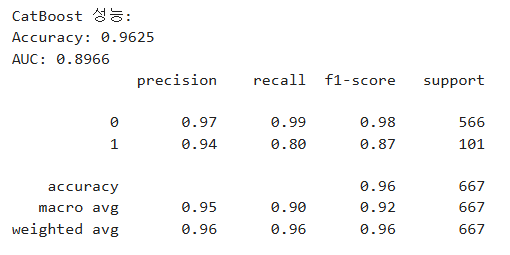

* 이탈율의 데이터 불균형에도 불구하고 정밀도와 재현율이 준수한 점수
* 정확도 96% AUC 0.89로 괜찮은 성능을 보임